# Title: Investigating  metrics in Random Forest algorithm

# Data preparation

Import some useful package such as numpy, pandas and matplotlib, which will be used to clean the data

In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

Using "open" to read the four files (train dataset, label of train dataset, test dataset, label of test dataset)

Read train dataset

In [2]:
with open("../../data/txt_round6_train.txt", "r") as f:
    train_data_x = f.read().splitlines()

Read label of train dataset

In [3]:
with open("../../data/txt_label_round6_train.txt", "r") as f:
    train_data_y = f.read().splitlines()
    
train_data_y = train_data_y[1:]

Read test dataset

In [4]:
with open("../../data/txt_round6_test.txt", "r") as f:
    test_data_x = f.read().splitlines()

Read label of train dataset

In [5]:
with open("../../data/txt_label_round6_test.txt", "r") as f:
    test_data_y = f.read().splitlines()
    
test_data_y = test_data_y[1:]

Also read the title of features

In [6]:
with open("../../data/train6_cols.txt", "r") as f:
    train6_cols = f.read().splitlines()

Here I count the number of samples for training and testing datasets, also count the number of features, just to make sure I read the data correctly

In [7]:
num_of_samples_train = len(train_data_x)
print("The number of training samples =", num_of_samples_train)

The number of training samples = 127878


In [8]:
num_of_features_train = len(train_data_x[0].split(" "))
print("The number of features =", num_of_features_train)

The number of features = 157


In [9]:
num_of_samples_test = len(test_data_x)
print("The number of testing samples =", num_of_samples_test)

The number of testing samples = 226381


In [10]:
num_of_features_test = len(test_data_x[0].split(" "))
print("The number of features =", num_of_features_test)

The number of features = 157


Then delete some features which are useless

In [11]:
list_train_data_x = []

for line in train_data_x:
    line = line.split(" ")
    del line[0]   # delete 'COADD_OBJECTS_ID'
    del line[-3]  # delete 'HPIX'
    del line[-2]  # delete 'FIELD'
    del line[-1]  # delte 'TRUE_CLASS'
    
    for i in range(len(line)):  # change string to float
        line[i] = float(line[i])
        
    list_train_data_x.append(line)

    
list_train_data_y = []

for i in range(len(train_data_y)):
    list_train_data_y.append(int(train_data_y[i]))

In [12]:
list_test_data_x = []

for i in range(len(test_data_y)):
    if test_data_y[i] == '1' or test_data_y[i] == '0':
        test_data_x[i] = test_data_x[i].split(" ")
        del test_data_x[i][0]
        del test_data_x[i][-3] # ?
        del test_data_x[i][-2]
        del test_data_x[i][-1]

        for j in range(len(test_data_x[i])):  # change string to float
            test_data_x[i][j] = float(test_data_x[i][j])

        list_test_data_x.append(test_data_x[i])

    
list_test_data_y = []

for i in range(len(test_data_y)):
    if test_data_y[i] == '1' or test_data_y[i] == '0':
        list_test_data_y.append(int(test_data_y[i]))

For train6_cols

In [13]:
cols = []

for line in train6_cols:
    line = line.split(" ")
    line = line[1]
    
    cols.append(line)
    
del cols[0]
del cols[-3] # ?
del cols[-2]
del cols[-1]

Count the number of class 0 and class 1, which will be used to compute the ratio of class0/class1 later

In [14]:
count_0_train = 0
count_1_train = 0

for i in range(len(list_train_data_y)):
    if list_train_data_y[i] == 0:
        count_0_train += 1
    else:
        count_1_train += 1
        
print("The number of '0' equals:", count_0_train)
print("The number of '1' equals:", count_1_train)
print("The total number equals:", count_0_train + count_1_train)

The number of '0' equals: 114046
The number of '1' equals: 13832
The total number equals: 127878


In [15]:
count_0_test = 0
count_1_test = 0
count_m1_test = 0
count_2_test = 0

for i in range(len(list_test_data_y)):
    if list_test_data_y[i] == 0:
        count_0_test += 1
    elif list_test_data_y[i] == 1:
        count_1_test += 1
    elif list_test_data_y[i] == -1:
        count_m1_test += 1
    elif list_test_data_y[i] == 2:
        count_2_test += 1

print("The number of '0' equals:", count_0_test)
print("The number of '1' equals:", count_1_test)
print("The total number equals:", count_0_test + count_1_test + count_m1_test + count_2_test)

The number of '0' equals: 196926
The number of '1' equals: 15750
The total number equals: 212676


Then, before training the model, we need to transfer the data into matrix

In [16]:
train_x = np.array(list_train_data_x)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x)
test_y = np.array(list_test_data_y)

In [17]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 153)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 153)
Testing Labels Shape: (212676,)


# Train the model

I tried three different different models, which are decision tree, neural network and random forest. 

For each of them, I tried to change parameters, and then compute the metrics of them and compare.

As far as I think, the performance of random forest is better than the other two models.

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier #load the bagging classifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import completeness_score

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

I choose some useful package from sklearn which can be used to train the model.

But when writing the report, it is necessary to add the details of these packages.

It means I need to introduce, for each parameters, why I choosed them.

Wirte the "compute_metrics". We just need to input the trained model, test dataset and the label of dataset

Then, it will compute the needed metrics, which are accuracy, precision score, recall score and auc

In [19]:
def compute_metrics(model, test_x, test_y):
    # probability
    prob_d = model.predict_proba(test_x)[:, 1]
    print("The probability is:", prob_d)

    # predict labels 
    result_d = model.predict(test_x)  

    # accuracy
    acc_d = accuracy_score(test_y, result_d)
    print("The accuracy is:", acc_d)

    # precision, recall and average precision rate
    precision_d = precision_score(test_y, result_d)
    recall_d = recall_score(test_y, result_d)
    print("The precision score is:", precision_score(test_y, result_d))
    print("The recall score is:", recall_score(test_y, result_d))
    # average_precision_d = average_precision_score(test_y, result_d)
    # print("The average precision rate is:", average_precision_d)

    # auc
    fpr_d, tpr_d, thresholds_d  =  roc_curve(test_y, prob_d) 
    print("The auc is:", auc(fpr_d, tpr_d))

    # plot
    plt.plot(fpr_d,tpr_d, label="model")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()

    plot_precision_recall_curve(model, test_x, test_y)
    plt.title("Precision-Recall")

In [20]:
def show_metrics(model, test_x, test_y):
    # predict labels 
    result_d = model.predict(test_x)  

    # accuracy
    acc_d = accuracy_score(test_y, result_d)

    # precision, recall
    precision_d = precision_score(test_y, result_d)
    recall_d = recall_score(test_y, result_d)
    
    return acc_d, precision_d, recall_d

This "perf_measure" is used to compute the number of TP, FP, TN and FN

In [21]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return TP, FP, TN, FN

#     print("TP = ", TP)
#     print("FP = ", FP)
#     print("TN = ", TN)
#     print("FN = ", FN)

This "plot_confusion_table" will plot out the results of TN, FP, FN, TP

In [22]:
def plot_confusion_table(test_y, result):
    cm = confusion_matrix(test_y, result)

    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

Now, we begin to train the model. 

I built models "bag_clf" and changed some metrics each time

In [23]:
# DecisionTreeClassifier:
# splitter{“best”, “random”}, default=”best”
# The strategy used to choose the split at each node. 
# Supported strategies are “best” to choose the best split and “random” to choose the best random split.

# BaggingClassifier:

# n_estimators=10 : The number of base estimators in the ensemble

# max_samples=1.0 : The number of samples to draw from X to train each base estimator

# bootstrapbool=True : Whether samples are drawn with replacement. If False, sampling without replacement is performed.
# Two ways to create new training sets:
# When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating)
# When sampling is performed without replacement, it is called pasting
# (bootstrap=True --> bagging) (bootstrap=False --> pasting)

# n_jobs=-1 : The number of jobs to run in parallel for both fit and predict.

Precision = TruePositives / (TruePositives + FalsePositives)

Recall = TruePositives / (TruePositives + FalseNegatives)

# bag_clf1

Train the model

In [24]:
bag_clf1 = BaggingClassifier(
    
    DecisionTreeClassifier(
        splitter="random", 
        random_state=42),
    
    n_estimators=10, #*** max trees ***
    max_samples=1.0, 
    bootstrap=True, #*** bagging *** 
    n_jobs=-1,
    random_state=42)

bag_clf1.fit(train_x, train_y)
result1 = bag_clf1.predict(test_x)

Confusion matrix

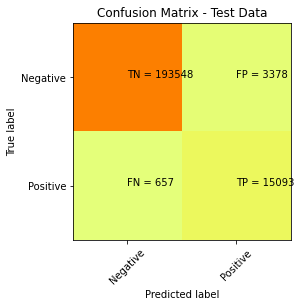

In [25]:
plot_confusion_table(test_y, result1)

Probability

In [26]:
prob1 = bag_clf1.predict_proba(test_x)[:, 1]

Auc

In [27]:
fpr1, tpr1, thresholds1  =  roc_curve(test_y, prob1) 

Compute metrics

The probability is: [0.  0.2 0.  ... 0.  0.  0. ]
The accuracy is: 0.9810274784178751
The precision score is: 0.8171187266525906
The recall score is: 0.9582857142857143
The auc is: 0.9935418490129803


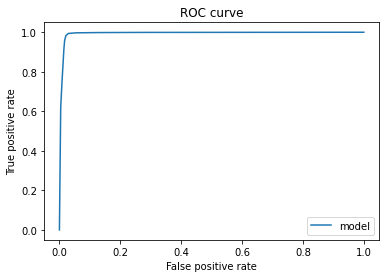

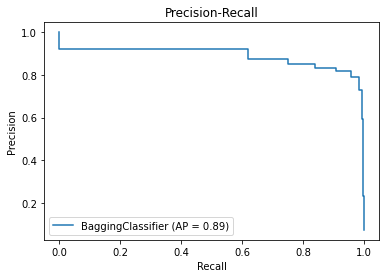

In [28]:
compute_metrics(bag_clf1, test_x, test_y)

Store metrics into lists

In [29]:
dict_metrics = {}

In [30]:
accuracy_1, precision_1, recall_1 = show_metrics(bag_clf1, test_x, test_y)
auc_1 = auc(fpr1, tpr1)
dict_metrics['bag_clf1'] = [accuracy_1, precision_1, recall_1, auc_1]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf1')

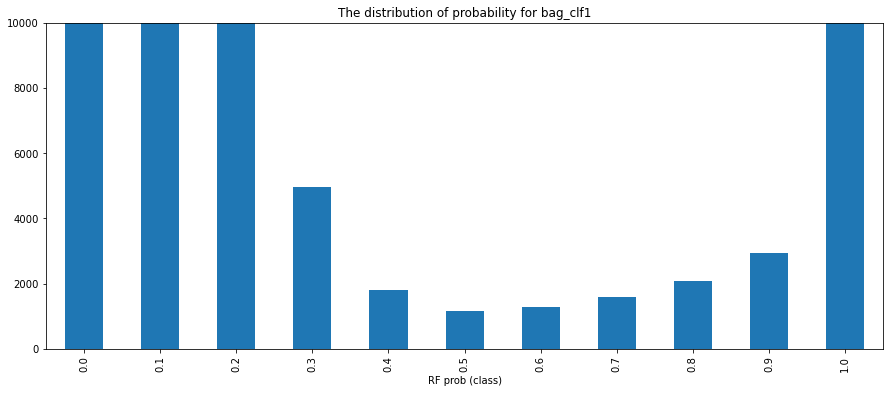

In [31]:
counts_clf1 = {}
for i in prob1:
    if i in counts_clf1: # list -> dict
        counts_clf1[i] += 1
    else:
        counts_clf1[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf1).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf1")

# Threshold for bag_clf1

In [32]:
# threshold_accuracy = []
# list_threshold = []

# for i in range(0,101):  
#     threshold = i/100
    
#     list_threshold.append(threshold)

#     predicted_proba = bag_clf1.predict_proba(test_x)
#     predicted = (predicted_proba [:,1] >= threshold).astype('int')

#     accuracy = accuracy_score(test_y, predicted)

#     threshold_accuracy.append(accuracy_score(test_y, predicted))

# plt.plot(list_threshold, threshold_accuracy)

# bag_clf2

Here I changed "bootstrap=True" to "bootstrap=False", thus we pasting rather than bagging

Train the model

In [33]:
bag_clf2 = BaggingClassifier(
    
    DecisionTreeClassifier(
        splitter="random",
        random_state=42),
    
    n_estimators=10, #*** max trees ***
    max_samples=1.0, 
    bootstrap=False, #*** pasting *** 
    n_jobs=-1,
    random_state=42)

bag_clf2.fit(train_x, train_y)
result2 = bag_clf2.predict(test_x)

Confusion matrix

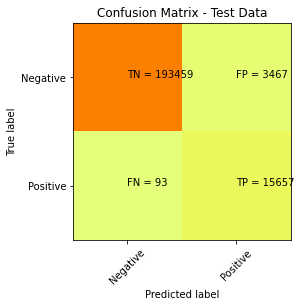

In [34]:
plot_confusion_table(test_y, result2)

Probability

In [35]:
prob2 = bag_clf2.predict_proba(test_x)[:, 1]

Auc

In [36]:
fpr2, tpr2, thresholds2  =  roc_curve(test_y, prob2) 

Compute metrics

The probability is: [0.  0.3 0.  ... 0.  0.  0. ]
The accuracy is: 0.9832609227181253
The precision score is: 0.8187094750052291
The recall score is: 0.9940952380952381
The auc is: 0.9961164272648383


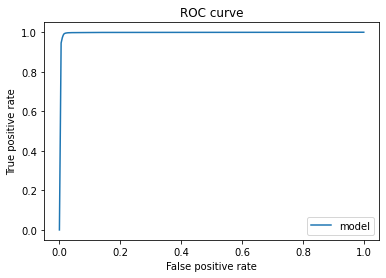

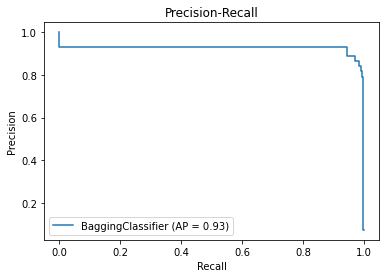

In [37]:
compute_metrics(bag_clf2, test_x, test_y)

Store metrics into lists

In [38]:
accuracy_2, precision_2, recall_2 = show_metrics(bag_clf2, test_x, test_y)
auc_2 = auc(fpr2, tpr2)
dict_metrics['bag_clf2'] = [accuracy_2, precision_2, recall_2, auc_2]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf2')

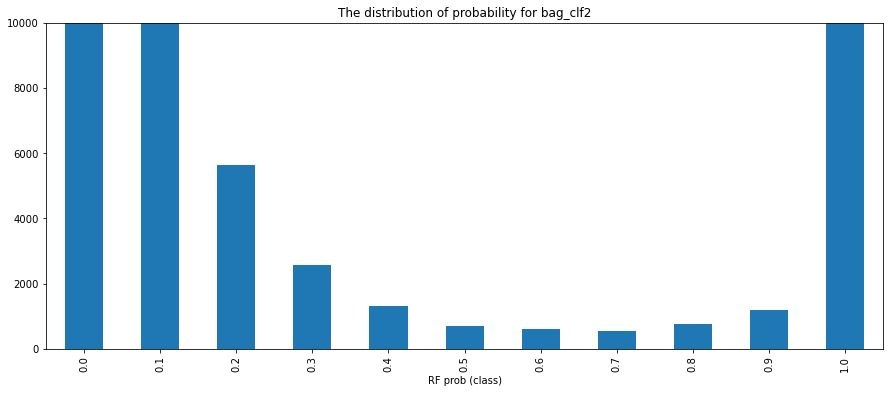

In [39]:
counts_clf2 = {}
for i in prob2:
    if i in counts_clf2: # list -> dict
        counts_clf2[i] += 1
    else:
        counts_clf2[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf2).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf2")

# Threshold for bag_clf2

In [40]:
# threshold_accuracy = []
# list_threshold = []

# for i in range(0,101):  
#     threshold = i/100
    
#     list_threshold.append(threshold)

#     predicted_proba = bag_clf2.predict_proba(test_x)
#     predicted = (predicted_proba [:,1] >= threshold).astype('int')

#     accuracy = accuracy_score(test_y, predicted)

#     threshold_accuracy.append(accuracy_score(test_y, predicted))

# plt.plot(list_threshold, threshold_accuracy)

# bag_clf3

In fact we can just use "RandomForestClassifier" directly rather using the combination of "BaggingClassifier" and "DecisionTreeClassifier"

Train the model

In [41]:
bag_clf3 = RandomForestClassifier(
    n_estimators=10,
    n_jobs=-1, 
    random_state=42)

bag_clf3.fit(train_x, train_y)
result3 = bag_clf3.predict(test_x)

Confusion matrix

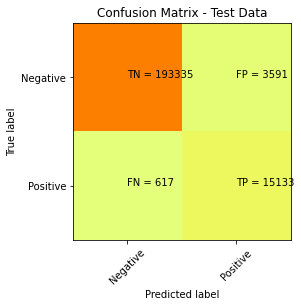

In [42]:
plot_confusion_table(test_y, result3)

Probability

In [43]:
prob3 = bag_clf3.predict_proba(test_x)[:, 1]

Auc

In [44]:
fpr3, tpr3, thresholds3  =  roc_curve(test_y, prob3) 

Compute metrics

The probability is: [0.  0.1 0.1 ... 0.  0.  0. ]
The accuracy is: 0.980214034493784
The precision score is: 0.8082140568254647
The recall score is: 0.9608253968253968
The auc is: 0.993330415953523


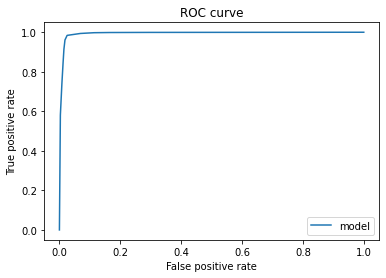

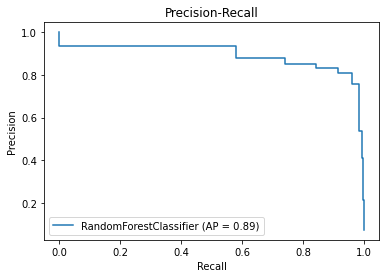

In [45]:
compute_metrics(bag_clf3, test_x, test_y)

Store metrics into lists

In [46]:
accuracy_3, precision_3, recall_3 = show_metrics(bag_clf3, test_x, test_y)
auc_3 = auc(fpr3, tpr3)
dict_metrics['bag_clf3'] = [accuracy_3, precision_3, recall_3, auc_3]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf3')

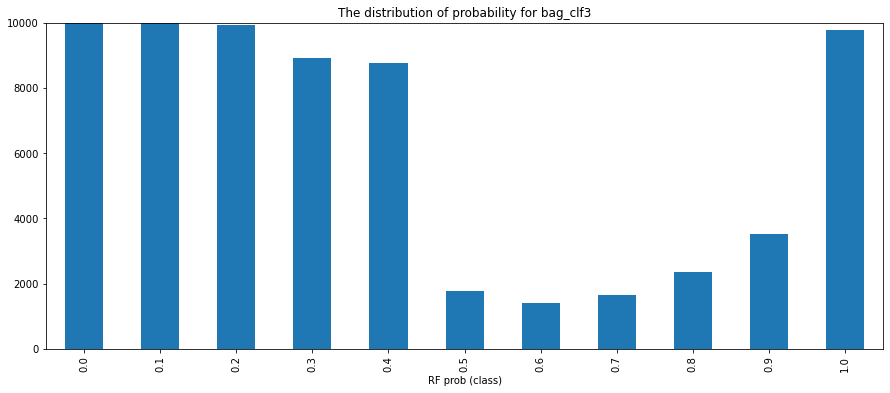

In [47]:
counts_clf3 = {}
for i in prob3:
    if i in counts_clf3: # list -> dict
        counts_clf3[i] += 1
    else:
        counts_clf3[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf3).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf3")

# Threshold for bag_clf3

In [48]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf3.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

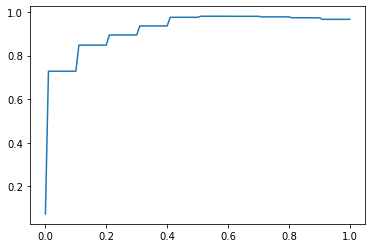

In [49]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf3 and the best threshold')

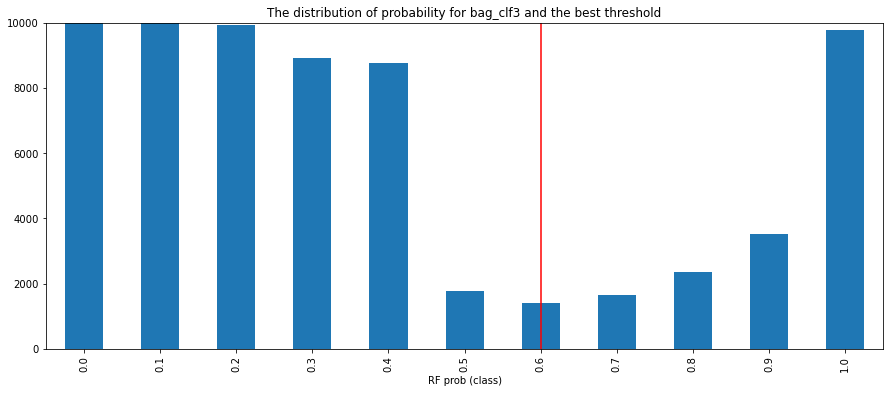

In [50]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf3).sort_index().plot.bar(fontsize=10)
plt.axvline(10*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf3 and the best threshold")

# bag_clf4

Change "n_estimators=10" to "n_estimators=50"

Train the model

In [51]:
bag_clf4 = RandomForestClassifier(
    n_estimators=50,
    n_jobs=-1,
    random_state=42)

bag_clf4.fit(train_x, train_y)
result4 = bag_clf4.predict(test_x)

Confusion matrix

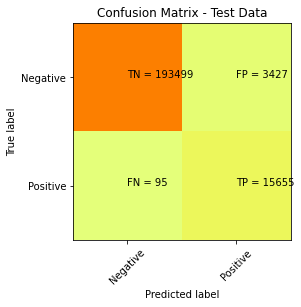

In [52]:
plot_confusion_table(test_y, result4)

Probability

In [53]:
prob4 = bag_clf4.predict_proba(test_x)[:, 1]

Auc

In [54]:
fpr4, tpr4, thresholds4  =  roc_curve(test_y, prob4) 

Compute metrics

The probability is: [0.02 0.14 0.02 ... 0.   0.   0.  ]
The accuracy is: 0.9834395982621452
The precision score is: 0.8204066659679279
The recall score is: 0.993968253968254
The auc is: 0.9956124906479251


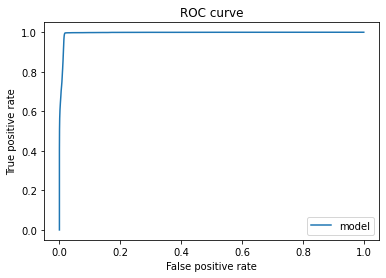

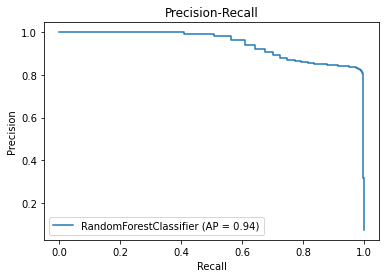

In [55]:
compute_metrics(bag_clf4, test_x, test_y)

Store metrics into lists

In [56]:
accuracy_4, precision_4, recall_4 = show_metrics(bag_clf4, test_x, test_y)
auc_4 = auc(fpr4, tpr4)
dict_metrics['bag_clf4'] = [accuracy_4, precision_4, recall_4, auc_4]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf4')

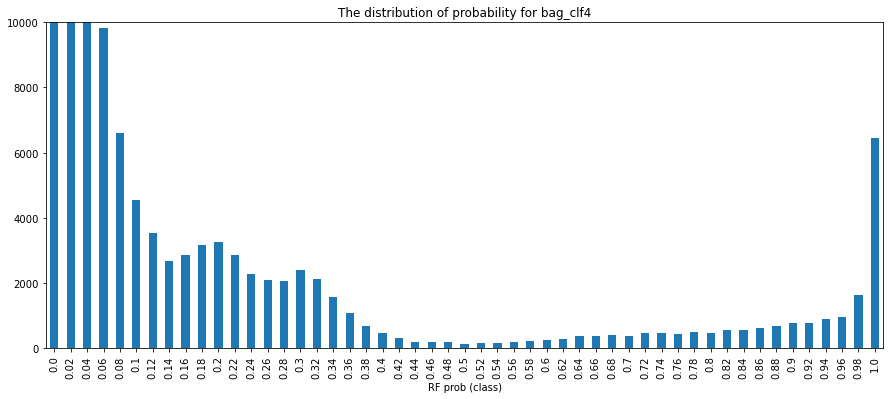

In [57]:
counts_clf4 = {}
for i in prob4:
    if i in counts_clf4: # list -> dict
        counts_clf4[i] += 1
    else:
        counts_clf4[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf4).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf4")

# Threshold for bag_clf4

In [58]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf4.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

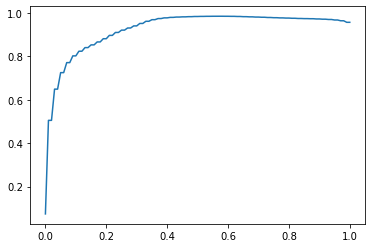

In [59]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf4 and the best threshold')

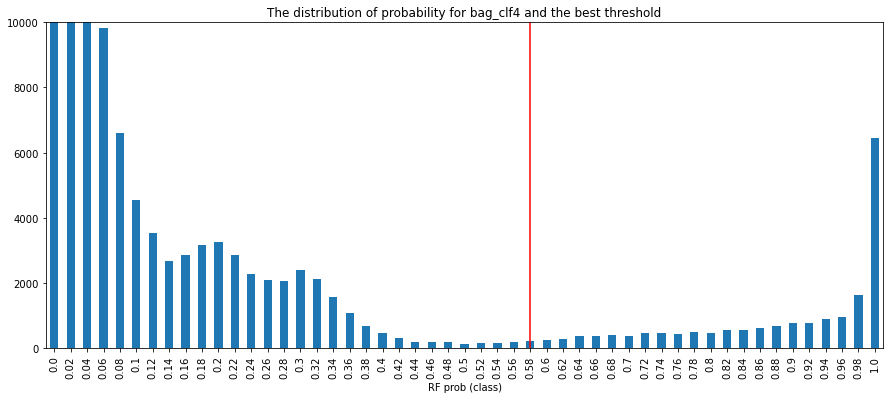

In [60]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf4).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf4 and the best threshold")

# bag_clf5

Change "n_estimators=10" to "n_estimators=100"

Train the model

In [61]:
bag_clf5 = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42)

bag_clf5.fit(train_x, train_y)
result5 = bag_clf4.predict(test_x)

Confusion matrix

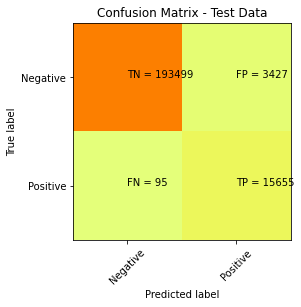

In [62]:
plot_confusion_table(test_y, result5)

Probability

In [63]:
prob5 = bag_clf5.predict_proba(test_x)[:, 1]

Auc

In [64]:
fpr5, tpr5, thresholds5  =  roc_curve(test_y, prob5) 

Compute metrics

The probability is: [0.05 0.23 0.03 ... 0.   0.01 0.01]
The accuracy is: 0.9832562207301246
The precision score is: 0.8175376439326838
The recall score is: 0.9962539682539683
The auc is: 0.9955898270706474


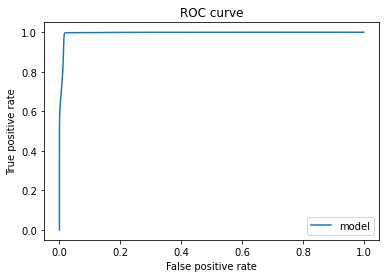

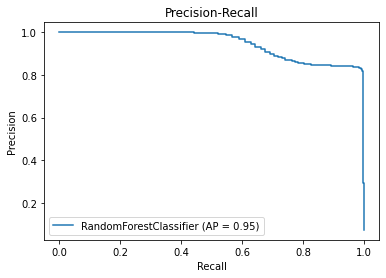

In [65]:
compute_metrics(bag_clf5, test_x, test_y)

Store metrics into lists

In [66]:
accuracy_5, precision_5, recall_5 = show_metrics(bag_clf5, test_x, test_y)
auc_5 = auc(fpr5, tpr5)
dict_metrics['bag_clf5'] = [accuracy_5, precision_5, recall_5, auc_5]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf5')

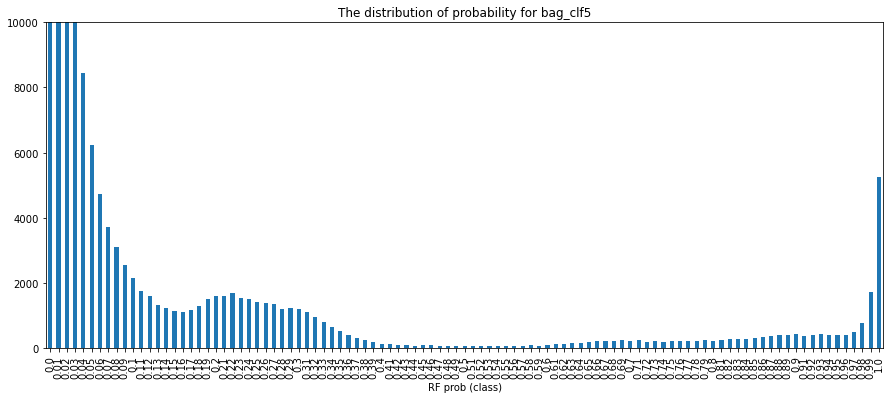

In [67]:
counts_clf5 = {}
for i in prob5:
    if i in counts_clf5: # list -> dict
        counts_clf5[i] += 1
    else:
        counts_clf5[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf5).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf5")

# Threshold for bag_clf5

In [68]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf5.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

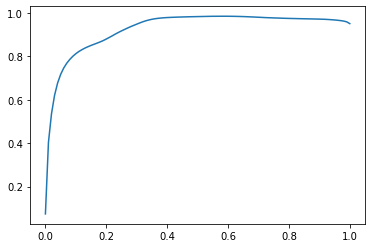

In [69]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf5 and the best threshold')

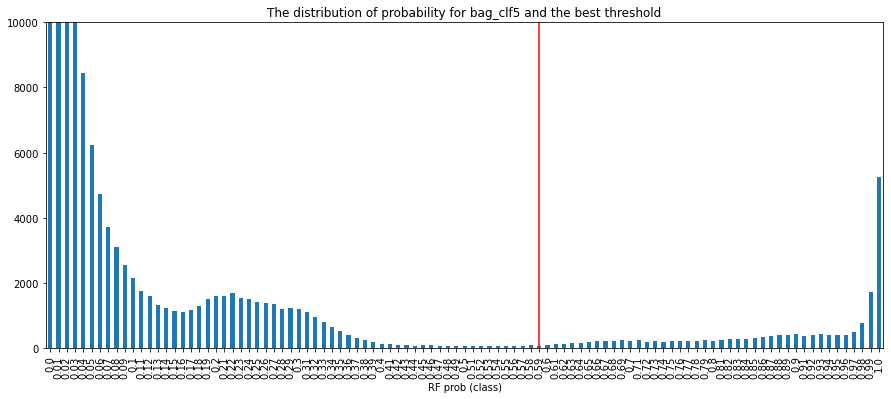

In [70]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf5).sort_index().plot.bar(fontsize=10)
plt.axvline(100*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf5 and the best threshold")

# bag_clf6

Choose "n_estimators=50" and "bootstrap=False"

Train the model

In [71]:
bag_clf6 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    n_jobs=-1, 
    random_state=42)

bag_clf6.fit(train_x, train_y)
result6 = bag_clf6.predict(test_x)

Confusion matrix

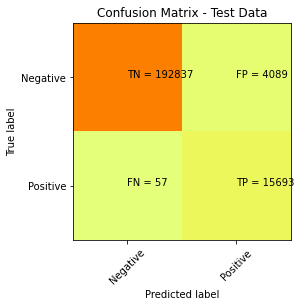

In [72]:
plot_confusion_table(test_y, result6)

Probability

In [73]:
prob6 = bag_clf6.predict_proba(test_x)[:, 1]

Auc

In [74]:
fpr6, tpr6, thresholds6  =  roc_curve(test_y, prob6) 

Compute metrics

The probability is: [0.02 0.32 0.02 ... 0.   0.   0.  ]
The accuracy is: 0.9805055577498166
The precision score is: 0.7932969366090385
The recall score is: 0.9963809523809524
The auc is: 0.9989333746992868


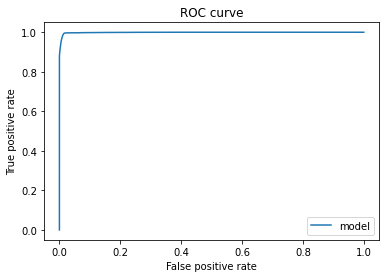

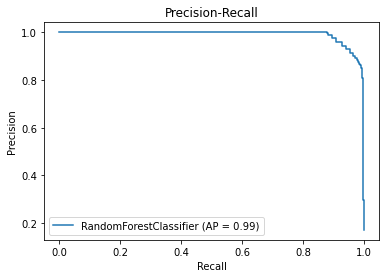

In [75]:
compute_metrics(bag_clf6, test_x, test_y)

Store metrics into lists

In [76]:
accuracy_6, precision_6, recall_6 = show_metrics(bag_clf6, test_x, test_y)
auc_6 = auc(fpr6, tpr6)
dict_metrics['bag_clf6'] = [accuracy_6, precision_6, recall_6, auc_6]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf6')

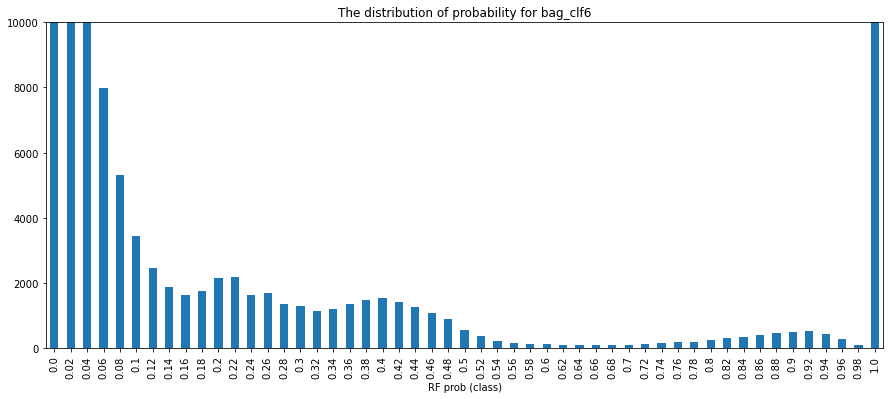

In [77]:
counts_clf6 = {}
for i in prob6:
    if i in counts_clf6: # list -> dict
        counts_clf6[i] += 1
    else:
        counts_clf6[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf6).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf6")

# Threshold for bag_clf6

In [78]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf6.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

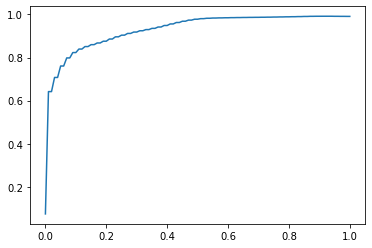

In [79]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf6 and the best threshold')

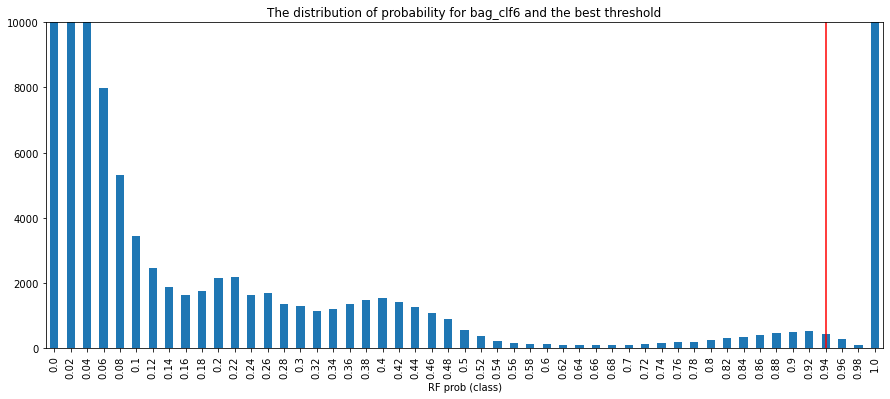

In [80]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf6).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf6 and the best threshold")

# bag_clf7

Add "min_samples_leaf=2"

Train the model

In [81]:
bag_clf7 = RandomForestClassifier(
    n_estimators=50,
    min_samples_leaf=2,
    n_jobs=-1, 
    random_state=42)

bag_clf7.fit(train_x, train_y)
result7 = bag_clf7.predict(test_x)

Confusion matrix

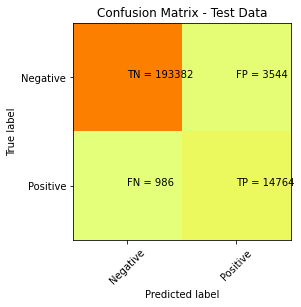

In [82]:
plot_confusion_table(test_y, result7)

Probability

In [83]:
prob7 = bag_clf7.predict_proba(test_x)[:, 1]

Auc

In [84]:
fpr7, tpr7, thresholds7  =  roc_curve(test_y, prob7) 

Compute metrics

The probability is: [0.04  0.08  0.01  ... 0.    0.    0.005]
The accuracy is: 0.9787093983336155
The precision score is: 0.8064780423858423
The recall score is: 0.9374603174603174
The auc is: 0.9941041227475825


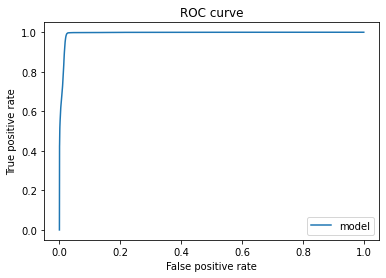

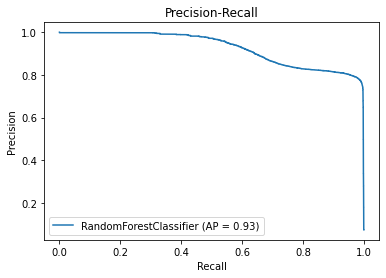

In [85]:
compute_metrics(bag_clf7, test_x, test_y)

Store metrics into lists

In [86]:
accuracy_7, precision_7, recall_7 = show_metrics(bag_clf7, test_x, test_y)
auc_7 = auc(fpr7, tpr7)
dict_metrics['bag_clf7'] = [accuracy_7, precision_7, recall_7, auc_7]

Plot the distribution of probability

In [87]:
# counts = {}
# for i in prob7:
#     if i in counts: # list -> dict
#         counts[i] += 1
#     else:
#         counts[i] = 1
        
# plt.figure(figsize=(15, 6))
# plt.ylim(0, 10000)
# plt.xlabel("RF prob (class)", fontsize=10)
# pd.Series(counts).sort_index().plot.bar(fontsize=10)

# Threshold for bag_clf7

In [88]:
# threshold_accuracy = []
# list_threshold = []

# for i in range(0,101):  
#     threshold = i/100
    
#     list_threshold.append(threshold)

#     predicted_proba = bag_clf7.predict_proba(test_x)
#     predicted = (predicted_proba [:,1] >= threshold).astype('int')

#     accuracy = accuracy_score(test_y, predicted)

#     threshold_accuracy.append(accuracy_score(test_y, predicted))

In [89]:
# plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

In [90]:
# for i in range(len(threshold_accuracy)):
#     if threshold_accuracy[i] == max(threshold_accuracy):
#         max_accuracy = list_threshold[i]

# plt.figure(figsize=(15, 6))
# plt.ylim(0, 10000)
# plt.xlabel("RF prob (class)", fontsize=10)
# pd.Series(counts).sort_index().plot.bar(fontsize=10)
# plt.axvline(50*max_accuracy, color="red")

# ROC

Here I plot the graph of ROC, the larger the area below the curve, the better the performance of model

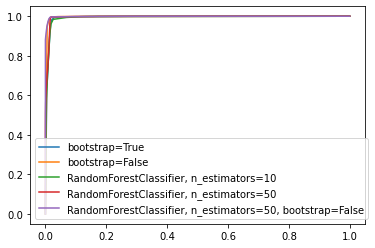

In [91]:
plt.plot(fpr1,tpr1, label="bootstrap=True")
plt.plot(fpr2,tpr2, label="bootstrap=False")
plt.plot(fpr3,tpr3, label="RandomForestClassifier, n_estimators=10")
plt.plot(fpr4,tpr4, label="RandomForestClassifier, n_estimators=50")
plt.plot(fpr6,tpr6, label="RandomForestClassifier, n_estimators=50, bootstrap=False")
plt.legend()

# Table of metrics from bag_clf1 to bag_clf7

In [92]:
pd.DataFrame(dict_metrics,index=['accuracy','precision','recall','auc'])

,bag_clf1,bag_clf2,bag_clf3,bag_clf4,bag_clf5,bag_clf6,bag_clf7
accuracy,0.981027,0.983261,0.980214,0.983440,0.983256,0.980506,0.978709
precision,0.817119,0.818709,0.808214,0.820407,0.817538,0.793297,0.806478
recall,0.958286,0.994095,0.960825,0.993968,0.996254,0.996381,0.937460
auc,0.993542,0.996116,0.993330,0.995612,0.995590,0.998933,0.994104


It seems that bag_clf4 performs best

# Ratio

Now change the ratio of class0/class1

We now concentrate on the given training dataset, and split into train set and test set (validation set)

We want to find the influence of the ratio class0/class1

We change the ratio by choosing the top xx samples

In [93]:
ratio_initial = count_0_train/count_1_train
print("The initial ratio:", ratio_initial)

The initial ratio: 8.245083863504917


In [94]:
print("The number of '0' equals:", count_0_train)
print("The number of '1' equals:", count_1_train)
print("The total number equals:", count_0_train + count_1_train)

The number of '0' equals: 114046
The number of '1' equals: 13832
The total number equals: 127878


Store the result into dict

In [95]:
dict_metrics_ratio = {}

In [96]:
dict_metrics_ratio['ratio = 8.245'] = [accuracy_4, precision_4, recall_4, auc_4]

Spilt the data into two lists by class (class 0 and class 1)

In [97]:
list_train_data_class = []

for line in train_data_x:
    line = line.split(" ")
    del line[0]   # delete 'COADD_OBJECTS_ID'
    del line[-3]
    del line[-2]  # delete 'FIELD'
    
    for i in range(len(line)):  # change string to float
        line[i] = float(line[i])
        
    list_train_data_class.append(line)

In [98]:
list_train_data_class0 = []
list_train_data_class1 = []

list_train_data_y_class0 = []
list_train_data_y_class1 = []

for i in range(len(list_train_data_class)):
    if list_train_data_class[i][-1] == 1:
        list_train_data_class1.append(list_train_data_class[i])
        list_train_data_y_class1.append(1)
    else:
        list_train_data_class0.append(list_train_data_class[i])
        list_train_data_y_class0.append(0)

for line in list_train_data_class1:
    del line[-1]

for line in list_train_data_class0:
    del line[-1]

# bag_clf8 (ratio = 7.230)

We first choose all of the class 1 and 100000 of the class 0

In [99]:
list_train_data_x = list_train_data_class0[:100000] + list_train_data_class1
list_train_data_y = list_train_data_y_class0[:100000] + list_train_data_y_class1

Transfer them to matrix

In [100]:
train_x_new1 = np.array(list_train_data_x)
train_y_new1 = np.array(list_train_data_y)
test_x_new1 = np.array(list_test_data_x)
test_y_new1 = np.array(list_test_data_y)

In [101]:
count_0_train_new1 = 0
count_1_train_new1 = 0

for i in range(len(train_y_new1)):
    if train_y_new1[i] == 0:
        count_0_train_new1 += 1
    else:
        count_1_train_new1 += 1
        
print("The number of '0' equals:", count_0_train_new1)
print("The number of '1' equals:", count_1_train_new1)
print("The total number equals:", count_0_train_new1 + count_1_train_new1)

The number of '0' equals: 100000
The number of '1' equals: 13832
The total number equals: 113832


Compute ratio

In [102]:
ratio_new1 = count_0_train_new1/count_1_train_new1
print("The ratio =", ratio_new1)

The ratio = 7.2296124927703875


Train the model

In [103]:
bag_clf8 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf8.fit(train_x_new1, train_y_new1)
result8 = bag_clf8.predict(test_x_new1)

Confusion matrix

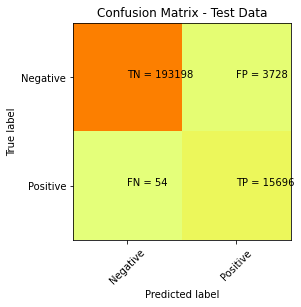

In [104]:
plot_confusion_table(test_y, result8)

Probability

In [105]:
prob8 = bag_clf8.predict_proba(test_x_new1)[:, 1]

Auc

In [106]:
fpr8, tpr8, thresholds8  =  roc_curve(test_y_new1, prob8) 

Compute metrics

The probability is: [0.2  0.26 0.02 ... 0.02 0.02 0.02]
The accuracy is: 0.9822170813820084
The precision score is: 0.8080724876441515
The recall score is: 0.9965714285714286
The auc is: 0.9988009014424724


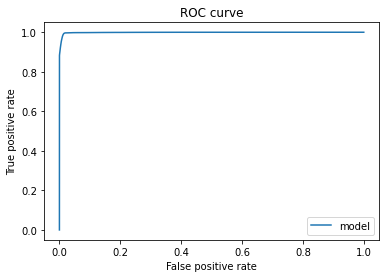

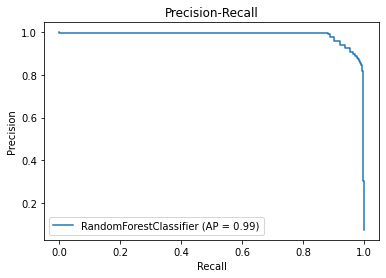

In [107]:
compute_metrics(bag_clf8, test_x_new1, test_y_new1)

Store metrics into lists

In [108]:
accuracy_8, precision_8, recall_8 = show_metrics(bag_clf8, test_x_new1, test_y_new1)
auc_8 = auc(fpr8, tpr8)
dict_metrics_ratio['ratio = 7.230'] = [accuracy_8, precision_8, recall_8, auc_8]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf8')

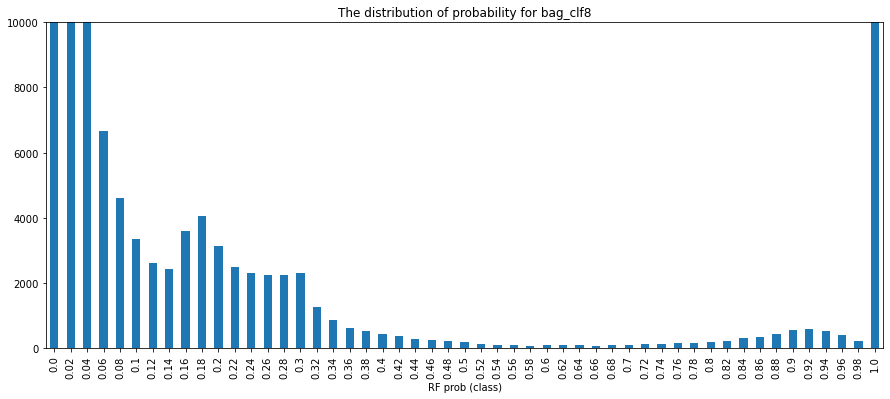

In [109]:
counts_clf8 = {}
for i in prob8:
    if i in counts_clf8: # list -> dict
        counts_clf8[i] += 1
    else:
        counts_clf8[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf8).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf8")

# Threshold for bag_clf8

In [110]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf8.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

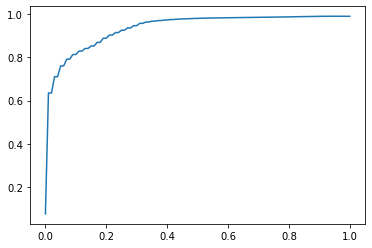

In [111]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf8 and the best threshold')

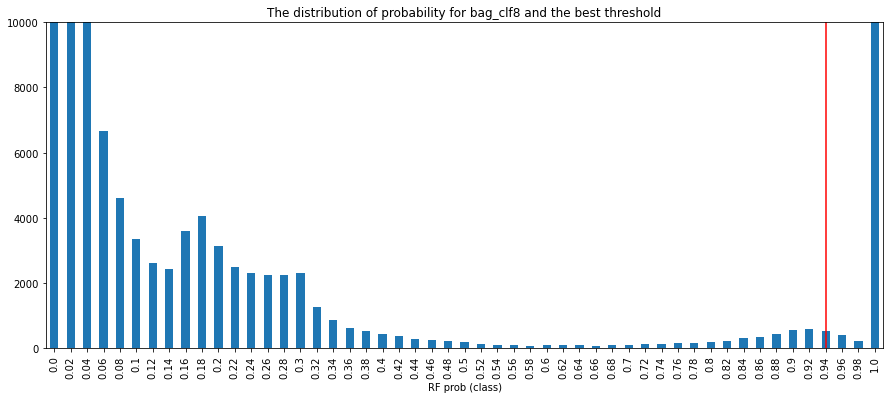

In [112]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf8).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf8 and the best threshold")

# bag_clf9 (ratio = 3.615)

Choose the top 50000 of class 0

In [113]:
list_train_data_x = list_train_data_class0[:50000] + list_train_data_class1
list_train_data_y = list_train_data_y_class0[:50000] + list_train_data_y_class1

In [114]:
# Transfer them to matrix
train_x_new2 = np.array(list_train_data_x)
train_y_new2 = np.array(list_train_data_y)
test_x_new2 = np.array(list_test_data_x)
test_y_new2 = np.array(list_test_data_y)

In [115]:
count_0_train_new2 = 0
count_1_train_new2 = 0

for i in range(len(train_y_new2)):
    if train_y_new2[i] == 0:
        count_0_train_new2 += 1
    else:
        count_1_train_new2 += 1
        
print("The number of '0' equals:", count_0_train_new2)
print("The number of '1' equals:", count_1_train_new2)
print("The total number equals:", count_0_train_new2 + count_1_train_new2)

The number of '0' equals: 50000
The number of '1' equals: 13832
The total number equals: 63832


Compute ratio

In [116]:
ratio_new2 = count_0_train_new2/count_1_train_new2
print("The ratio =", ratio_new2)

The ratio = 3.6148062463851938


Train the model

In [117]:
bag_clf9 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf9.fit(train_x_new2, train_y_new2)
result9 = bag_clf9.predict(test_x_new2)

Confusion matrix

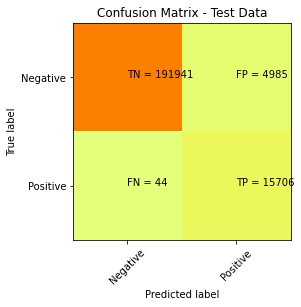

In [118]:
plot_confusion_table(test_y, result9)

Probability

In [119]:
prob9 = bag_clf9.predict_proba(test_x_new2)[:, 1]

Auc

In [120]:
fpr9, tpr9, thresholds9  =  roc_curve(test_y_new2, prob9) 

Compute metrics

The probability is: [0.2  0.18 0.04 ... 0.02 0.02 0.  ]
The accuracy is: 0.9763537023453516
The precision score is: 0.7590739935237543
The recall score is: 0.9972063492063492
The auc is: 0.9981163926051346


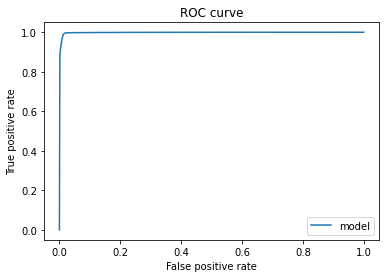

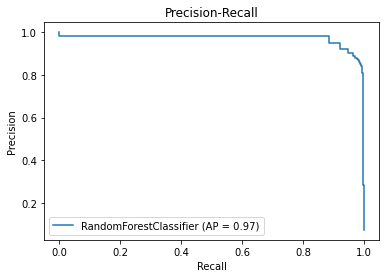

In [121]:
compute_metrics(bag_clf9, test_x_new2, test_y_new2)

Store metrics into lists

In [122]:
accuracy_9, precision_9, recall_9 = show_metrics(bag_clf9, test_x_new2, test_y_new2)
auc_9 = auc(fpr9, tpr9)
dict_metrics_ratio['ratio = 3.615'] = [accuracy_9, precision_9, recall_9, auc_9]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf9')

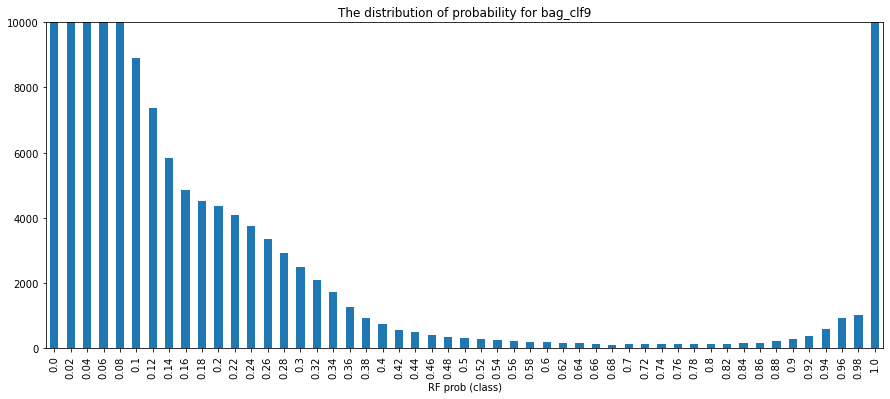

In [123]:
counts_clf9 = {}
for i in prob9:
    if i in counts_clf9: # list -> dict
        counts_clf9[i] += 1
    else:
        counts_clf9[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf9).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf9")

# Threshold for bag_clf9

In [124]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf9.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

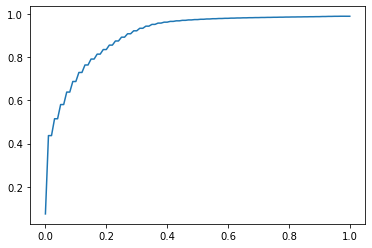

In [125]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf9 and the best threshold')

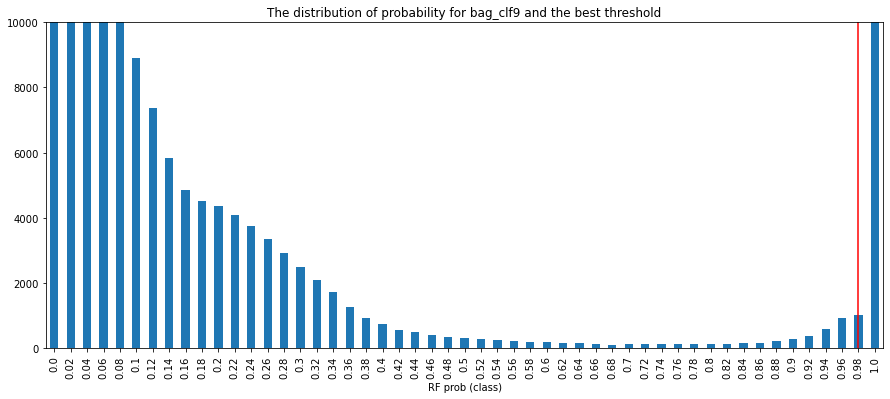

In [126]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf9).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf9 and the best threshold")

# bag_clf10 (ratio = 2.169)

Choose the top 30000 of class 0

In [127]:
list_train_data_x = list_train_data_class0[:30000] + list_train_data_class1
list_train_data_y = list_train_data_y_class0[:30000] + list_train_data_y_class1

In [128]:
# Transfer them to matrix
train_x_new3 = np.array(list_train_data_x)
train_y_new3 = np.array(list_train_data_y)
test_x_new3 = np.array(list_test_data_x)
test_y_new3 = np.array(list_test_data_y)

In [129]:
count_0_train_new3 = 0
count_1_train_new3 = 0

for i in range(len(train_y_new3)):
    if train_y_new3[i] == 0:
        count_0_train_new3 += 1
    else:
        count_1_train_new3 += 1
        
print("The number of '0' equals:", count_0_train_new3)
print("The number of '1' equals:", count_1_train_new3)
print("The total number equals:", count_0_train_new3 + count_1_train_new3)

The number of '0' equals: 30000
The number of '1' equals: 13832
The total number equals: 43832


Compute ratio

In [130]:
ratio_new3 = count_0_train_new3/count_1_train_new3
print("The ratio =", ratio_new3)

The ratio = 2.1688837478311163


Train the model

In [131]:
bag_clf10 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf10.fit(train_x_new3, train_y_new3)
result10 = bag_clf10.predict(test_x_new3)

Confusion matrix

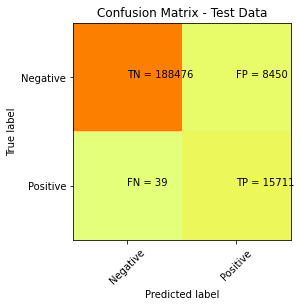

In [132]:
plot_confusion_table(test_y, result10)

Probability

In [133]:
prob10 = bag_clf10.predict_proba(test_x_new3)[:, 1]

Auc

In [134]:
fpr10, tpr10, thresholds10  =  roc_curve(test_y_new3, prob10) 

Compute metrics

The probability is: [0.22 0.26 0.22 ... 0.06 0.16 0.22]
The accuracy is: 0.9600848238635294
The precision score is: 0.6502628202475063
The recall score is: 0.9975238095238095
The auc is: 0.9970148409627402


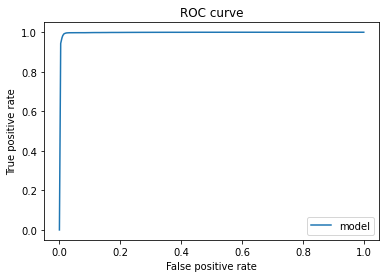

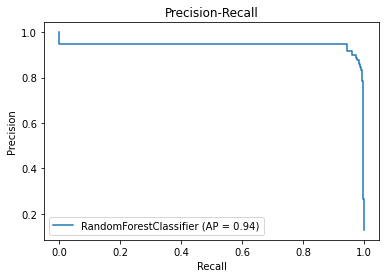

In [135]:
compute_metrics(bag_clf10, test_x_new3, test_y_new3)

Store metrics into lists

In [136]:
accuracy_10, precision_10, recall_10 = show_metrics(bag_clf10, test_x_new3, test_y_new3)
auc_10 = auc(fpr10, tpr10)
dict_metrics_ratio['ratio = 2.169'] = [accuracy_10, precision_10, recall_10, auc_10]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf10')

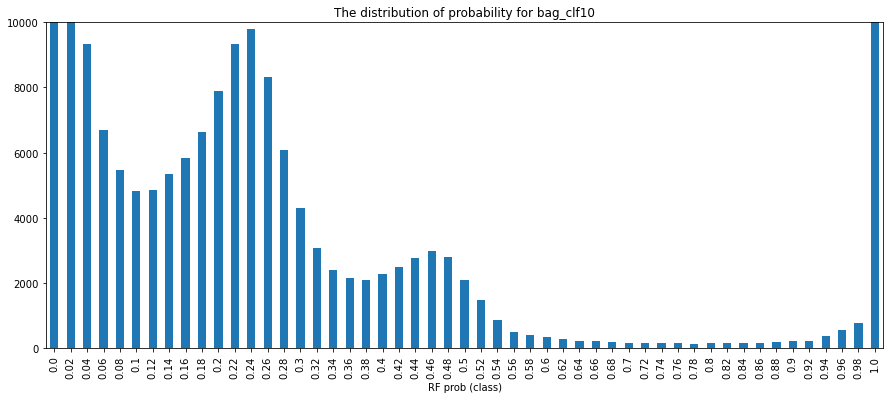

In [137]:
counts_clf10 = {}
for i in prob10:
    if i in counts_clf10: # list -> dict
        counts_clf10[i] += 1
    else:
        counts_clf10[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf10).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf10")

# Threshold for bag_clf10

In [138]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf10.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

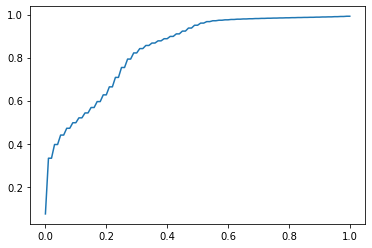

In [139]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf10 and the best threshold')

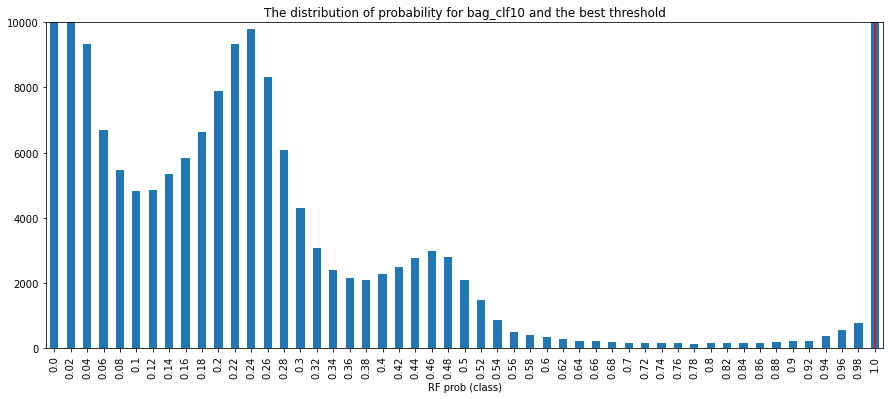

In [140]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_clf10).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf10 and the best threshold")

# Feature importance with different ratio

The initial ratio

In [141]:
# Get feature importances
importances = list(bag_clf4.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CLASS_STAR_R         Importance: 0.0482
Variable: WAVG_SPREAD_MODEL_I  Importance: 0.0446
Variable: MODEST_CLASS         Importance: 0.0426
Variable: SPREAD_MODEL_I       Importance: 0.0368
Variable: WAVG_SPREAD_MODEL_R  Importance: 0.0347
Variable: WAVGCALIB_MAG_PSF_Z  Importance: 0.0272
Variable: WAVG_SPREAD_MODEL_Z  Importance: 0.0235
Variable: WAVG_MAGERR_PSF_I    Importance: 0.0227
Variable: CLASS_STAR_Z         Importance: 0.0221
Variable: MAGERR_MODEL_I       Importance: 0.0212
Variable: SPREAD_MODEL_R       Importance: 0.0211
Variable: CLASS_STAR_I         Importance: 0.0211
Variable: SPREAD_MODEL_Z       Importance: 0.0205
Variable: MU_MAX_Z             Importance: 0.0199
Variable: WAVGCALIB_MAG_PSF_I  Importance: 0.0194
Variable: MAGERR_PSF_I         Importance: 0.0184
Variable: MAGERR_MODEL_Z       Importance: 0.0164
Variable: MU_MAX_I             Importance: 0.0159
Variable: CLASS_STAR_G         Importance: 0.0153
Variable: MAGERR_DETMODEL_I    Importance: 0.0139


ratio = 7.230

In [142]:
# Get feature importances
importances = list(bag_clf8.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MODEST_CLASS         Importance: 0.0553
Variable: CLASS_STAR_R         Importance: 0.0524
Variable: SPREAD_MODEL_I       Importance: 0.0384
Variable: WAVG_SPREAD_MODEL_I  Importance: 0.0371
Variable: WAVG_SPREAD_MODEL_Z  Importance: 0.0323
Variable: WAVG_SPREAD_MODEL_R  Importance: 0.0312
Variable: MAGERR_MODEL_I       Importance: 0.0295
Variable: CLASS_STAR_I         Importance: 0.0289
Variable: WAVGCALIB_MAG_PSF_I  Importance: 0.0263
Variable: CLASS_STAR_Z         Importance: 0.0228
Variable: SPREAD_MODEL_R       Importance: 0.0215
Variable: WAVG_MAGERR_PSF_I    Importance: 0.0209
Variable: WAVGCALIB_MAG_PSF_Z  Importance: 0.0206
Variable: SPREAD_MODEL_Z       Importance: 0.019
Variable: MAGERR_AUTO_I        Importance: 0.0174
Variable: MU_MAX_I             Importance: 0.017
Variable: MU_MAX_Z             Importance: 0.0154
Variable: CLASS_STAR_G         Importance: 0.0151
Variable: MAGERR_DETMODEL_Y    Importance: 0.0138
Variable: MU_MAX_Y             Importance: 0.0138
Va

ratio = 3.615

In [143]:
# Get feature importances
importances = list(bag_clf9.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MODEST_CLASS         Importance: 0.0606
Variable: CLASS_STAR_R         Importance: 0.0526
Variable: SPREAD_MODEL_I       Importance: 0.0427
Variable: MU_MAX_I             Importance: 0.0371
Variable: WAVG_SPREAD_MODEL_R  Importance: 0.0329
Variable: WAVG_SPREAD_MODEL_I  Importance: 0.0317
Variable: WAVG_SPREAD_MODEL_Z  Importance: 0.0311
Variable: SPREAD_MODEL_R       Importance: 0.0292
Variable: SPREAD_MODEL_Z       Importance: 0.0244
Variable: WAVG_MAGERR_PSF_I    Importance: 0.0242
Variable: CLASS_STAR_I         Importance: 0.0209
Variable: FWHM_WORLD_Z         Importance: 0.0209
Variable: WAVGCALIB_MAG_PSF_I  Importance: 0.0202
Variable: CLASS_STAR_Z         Importance: 0.0191
Variable: WAVGCALIB_MAG_PSF_Z  Importance: 0.0188
Variable: MAGERR_PSF_Z         Importance: 0.0152
Variable: MAGERR_PSF_I         Importance: 0.0144
Variable: MAGERR_MODEL_I       Importance: 0.0135
Variable: MU_MAX_Y             Importance: 0.0135
Variable: MU_MAX_Z             Importance: 0.0121


ratio = 2.169

In [144]:
# Get feature importances
importances = list(bag_clf10.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MODEST_CLASS         Importance: 0.0558
Variable: WAVG_SPREAD_MODEL_I  Importance: 0.047
Variable: WAVG_SPREAD_MODEL_Z  Importance: 0.0422
Variable: SPREAD_MODEL_I       Importance: 0.0392
Variable: CLASS_STAR_R         Importance: 0.0341
Variable: SPREAD_MODEL_R       Importance: 0.0331
Variable: WAVG_SPREAD_MODEL_R  Importance: 0.0298
Variable: SPREAD_MODEL_Z       Importance: 0.0293
Variable: MU_MAX_I             Importance: 0.028
Variable: WAVG_MAGERR_PSF_I    Importance: 0.0257
Variable: CLASS_STAR_Z         Importance: 0.0243
Variable: FLUX_RADIUS_I        Importance: 0.0225
Variable: FWHM_WORLD_Z         Importance: 0.0202
Variable: CLASS_STAR_I         Importance: 0.0198
Variable: WAVGCALIB_MAG_PSF_Z  Importance: 0.0192
Variable: MAGERR_DETMODEL_I    Importance: 0.0141
Variable: MAG_PSF_Z            Importance: 0.0137
Variable: MAGERR_PSF_Z         Importance: 0.0127
Variable: SPREADERR_MODEL_Z    Importance: 0.0122
Variable: MAG_PSF_I            Importance: 0.012
Var

# Table of different ratios

In [145]:
pd.DataFrame(dict_metrics_ratio,index=['accuracy','precision','recall','auc'])

,ratio = 8.245,ratio = 7.230,ratio = 3.615,ratio = 2.169
accuracy,0.983440,0.982217,0.976354,0.960085
precision,0.820407,0.808072,0.759074,0.650263
recall,0.993968,0.996571,0.997206,0.997524
auc,0.995612,0.998801,0.998116,0.997015


The result shows that the change of ratio will influence the metrics of accuracy and precision, but has little influence to recall.

# Compare the distribution of probability

<Figure size 432x288 with 0 Axes>

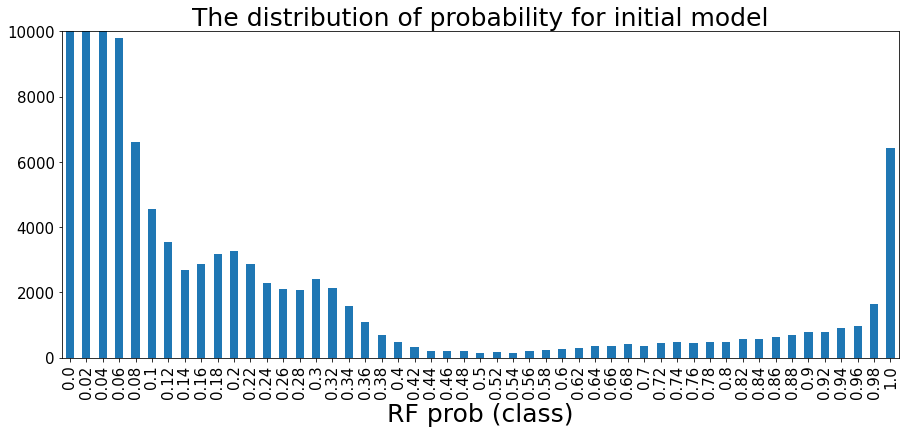

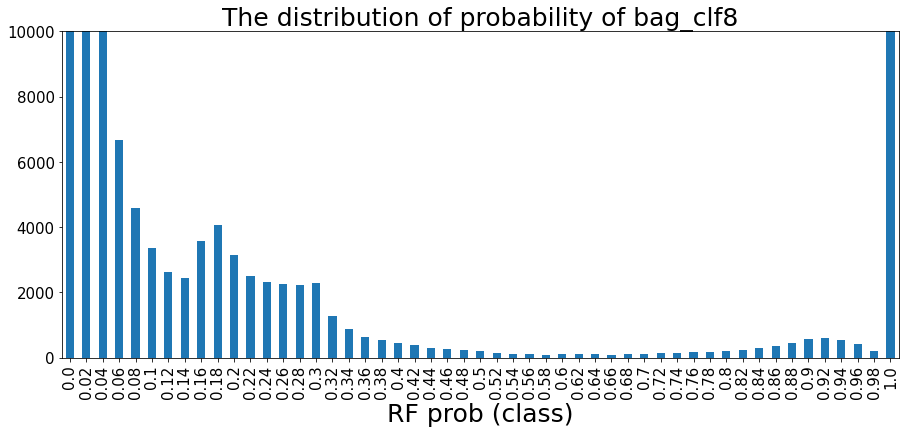

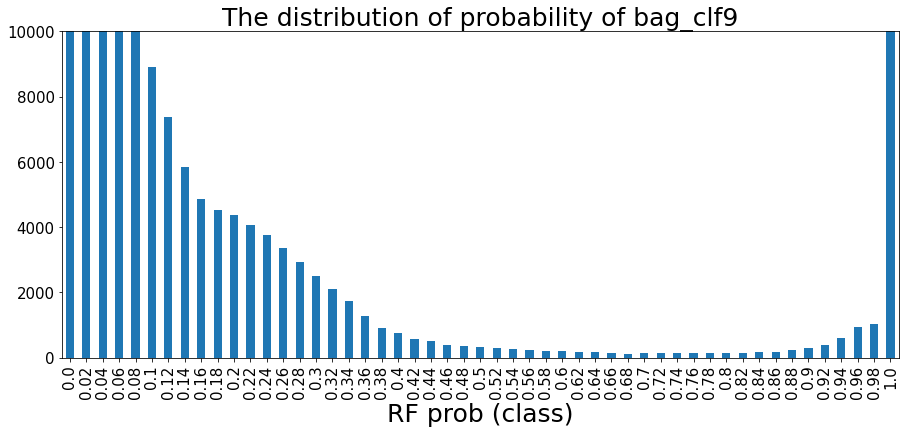

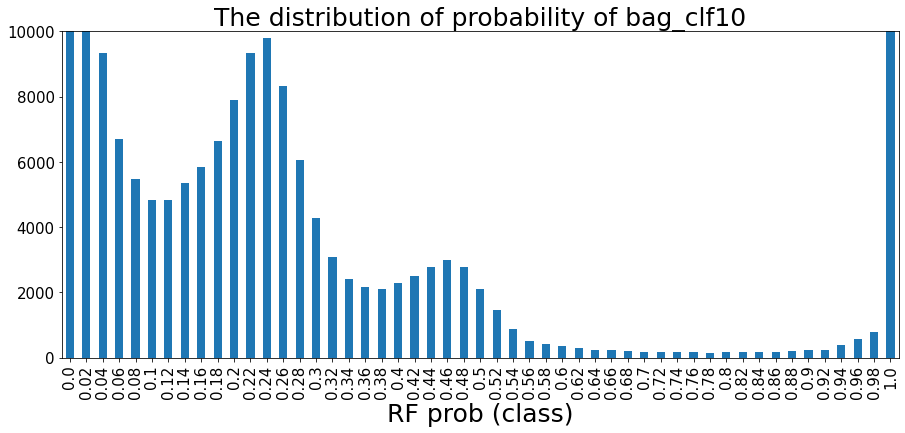

In [146]:
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability for initial model", fontsize=25)
pd.Series(counts_clf4).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

plt.figure(2)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of bag_clf8", fontsize=25)
pd.Series(counts_clf8).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

plt.figure(3)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of bag_clf9", fontsize=25)
pd.Series(counts_clf9).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

plt.figure(4)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of bag_clf10", fontsize=25)
pd.Series(counts_clf10).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

# Feature importance

Let's look at the feature importances of our explanatory variables

In [147]:
# Get feature importances
importances = list(bag_clf4.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(cols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CLASS_STAR_R         Importance: 0.0482
Variable: WAVG_SPREAD_MODEL_I  Importance: 0.0446
Variable: MODEST_CLASS         Importance: 0.0426
Variable: SPREAD_MODEL_I       Importance: 0.0368
Variable: WAVG_SPREAD_MODEL_R  Importance: 0.0347
Variable: WAVGCALIB_MAG_PSF_Z  Importance: 0.0272
Variable: WAVG_SPREAD_MODEL_Z  Importance: 0.0235
Variable: WAVG_MAGERR_PSF_I    Importance: 0.0227
Variable: CLASS_STAR_Z         Importance: 0.0221
Variable: MAGERR_MODEL_I       Importance: 0.0212
Variable: SPREAD_MODEL_R       Importance: 0.0211
Variable: CLASS_STAR_I         Importance: 0.0211
Variable: SPREAD_MODEL_Z       Importance: 0.0205
Variable: MU_MAX_Z             Importance: 0.0199
Variable: WAVGCALIB_MAG_PSF_I  Importance: 0.0194
Variable: MAGERR_PSF_I         Importance: 0.0184
Variable: MAGERR_MODEL_Z       Importance: 0.0164
Variable: MU_MAX_I             Importance: 0.0159
Variable: CLASS_STAR_G         Importance: 0.0153
Variable: MAGERR_DETMODEL_I    Importance: 0.0139


**Visualizations**

Make a simple bar plot of the feature importances to illustrate the disparities in the relative significance of the variables

<BarContainer object of 153 artists>

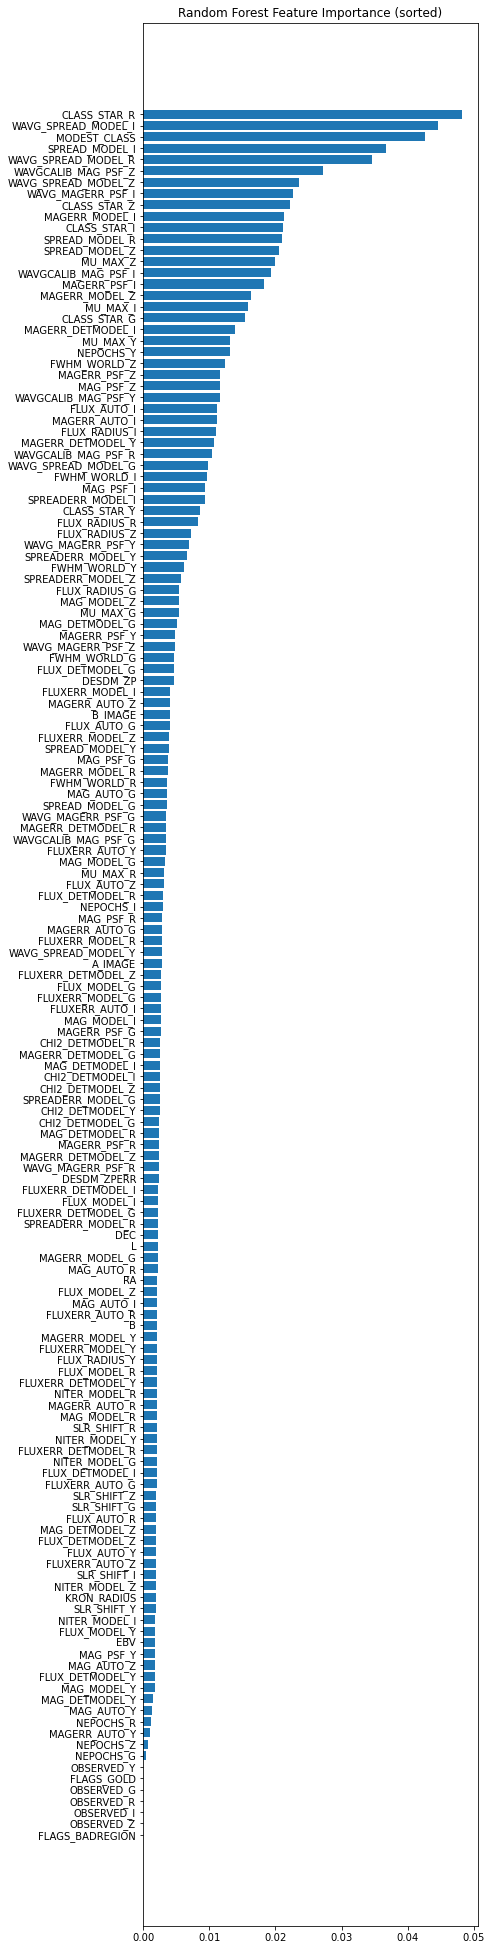

In [148]:
sorted_idx = bag_clf4.feature_importances_.argsort()

cols_sorted = []

for i in sorted_idx:
    cols_sorted.append(cols[i])

plt.figure(figsize=(6, 35))
plt.title("Random Forest Feature Importance (sorted)")
plt.barh(cols_sorted, bag_clf4.feature_importances_[sorted_idx])

**Cumulative importance**

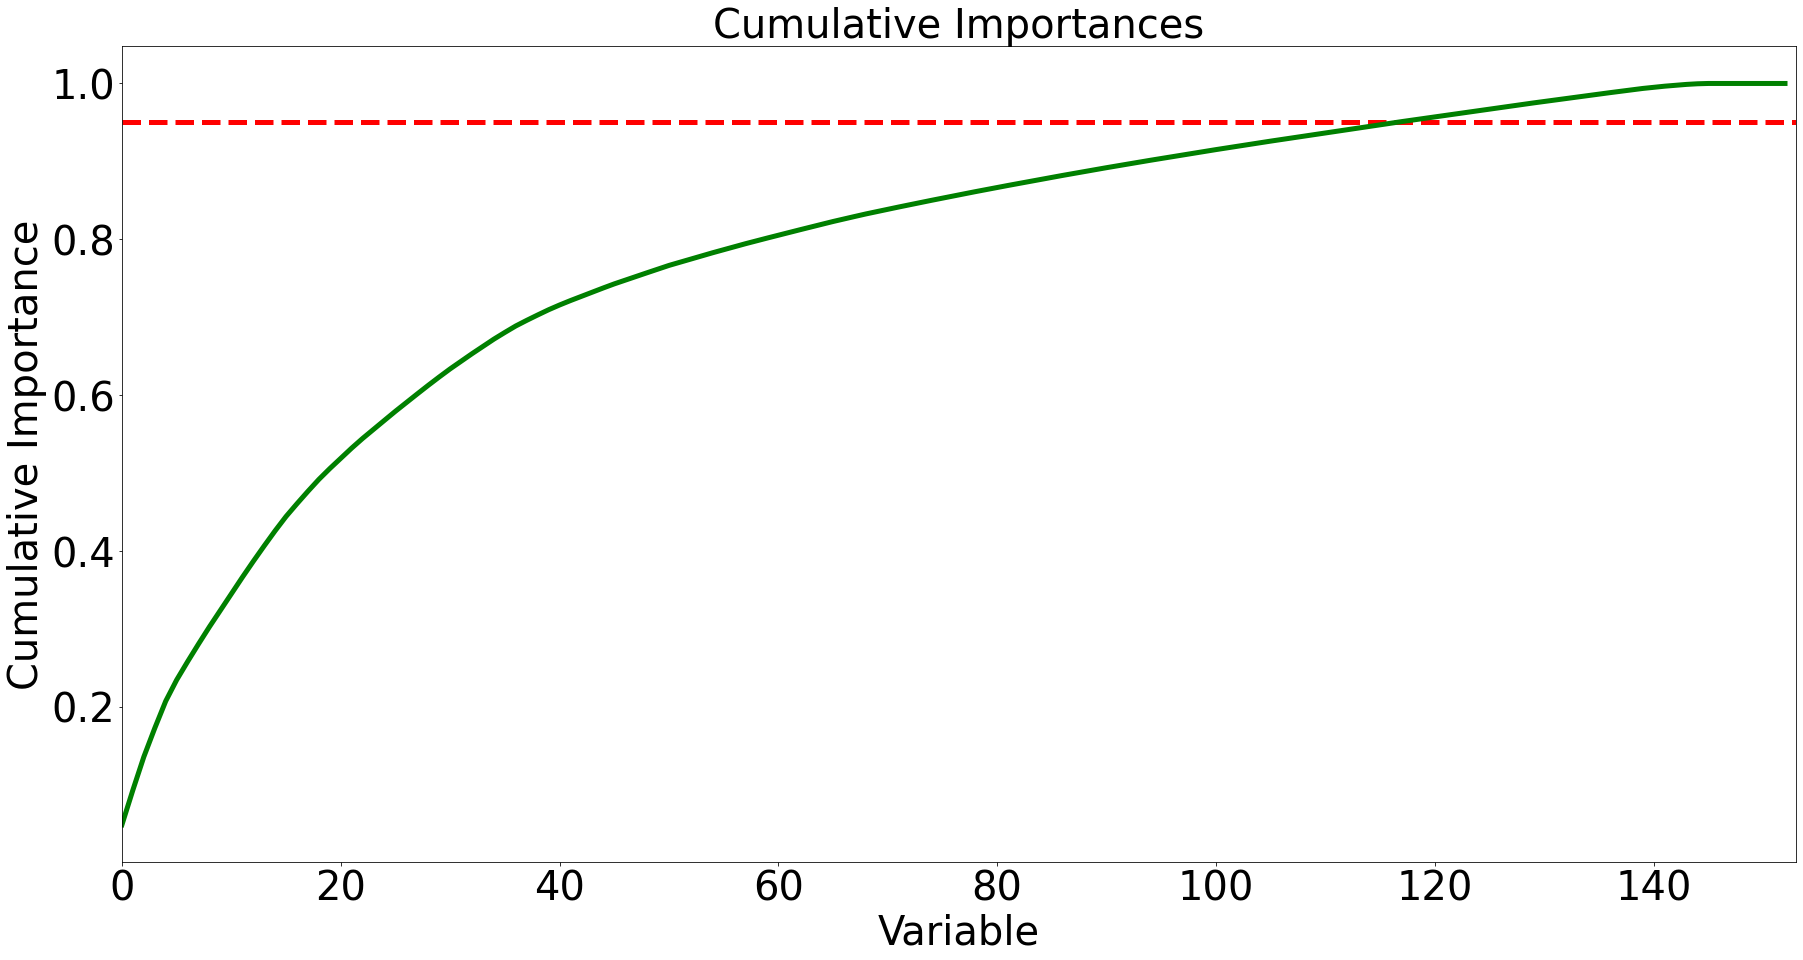

In [149]:
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.figure(figsize=(30, 15))
plt.plot(x_values, cumulative_importances, 'g-', linewidth=5)
plt.tick_params(labelsize=40)
plt.xlim(0,153)

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed', linewidth=5)

# # Format x ticks and labels
# plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable',fontsize=40); plt.ylabel('Cumulative Importance',fontsize=40); plt.title('Cumulative Importances',fontsize=40);

Find number of features for cumulative importance of 95%

In [150]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 118


Find number of features for cumulative importance of 90%

In [151]:
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 95


# bag_clf11 (top118 features)

We now try to choose top118 important features to see the accuracy

In [152]:
top118 = bag_clf4.feature_importances_.argsort()[::-1][0:118]

In [153]:
list_train_data_x = []

for line in train_data_x:
    line = line.split(" ")
    del line[0]   # delete 'COADD_OBJECTS_ID'
    del line[-3]  # delete 'HPIX'?
    del line[-2]  # delete 'FIELD'
    del line[-1]  # delte 'TRUE_CLASS'
    
    for i in range(len(line)):  # change string to float
        line[i] = float(line[i])
        
    list_train_data_x.append(line)

    
list_train_data_y = []

for i in range(len(train_data_y)):
    list_train_data_y.append(int(train_data_y[i]))

In [154]:
list_train_data_x_top118_features = []

for i in range(len(list_train_data_x)):
    features = []
    for j in top118:
        features.append(list_train_data_x[i][j])
    list_train_data_x_top118_features.append(features)

In [155]:
list_test_data_x_top118_features = []

for i in range(len(list_test_data_x)):
    features = []
    for j in top118:
        features.append(list_test_data_x[i][j])
    list_test_data_x_top118_features.append(features)

Transfer them to matrix

In [156]:
train_x = np.array(list_train_data_x_top118_features)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x_top118_features)
test_y = np.array(list_test_data_y)

In [157]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 118)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 118)
Testing Labels Shape: (212676,)


Train the model

In [158]:
bag_clf11 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf11.fit(train_x, train_y)
result11 = bag_clf11.predict(test_x)

Confusion matrix

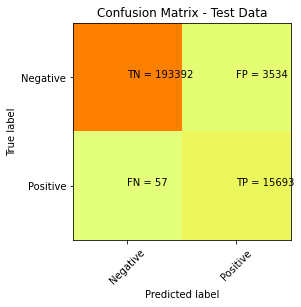

In [159]:
plot_confusion_table(test_y, result11)

Probability

In [160]:
prob11 = bag_clf11.predict_proba(test_x)[:, 1]

Auc

In [161]:
fpr11, tpr11, thresholds11  =  roc_curve(test_y, prob11) 

Compute metrics

The probability is: [0.1  0.04 0.04 ... 0.   0.   0.  ]
The accuracy is: 0.9831151610901089
The precision score is: 0.8161959744109846
The recall score is: 0.9963809523809524
The auc is: 0.9988338194558297


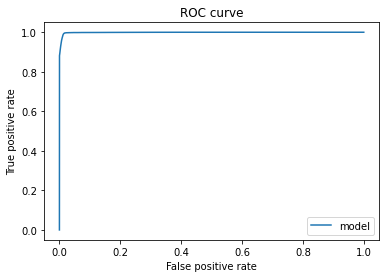

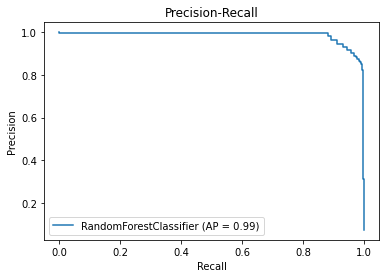

In [162]:
compute_metrics(bag_clf11, test_x, test_y)

Store metrics into lists

In [163]:
dict_metrics_11_14 = {}

In [164]:
accuracy_11, precision_11, recall_11 = show_metrics(bag_clf11, test_x, test_y)
auc_11 = auc(fpr11, tpr11)
dict_metrics_11_14['bag_clf11'] = [accuracy_11, precision_11, recall_11, auc_11]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf11')

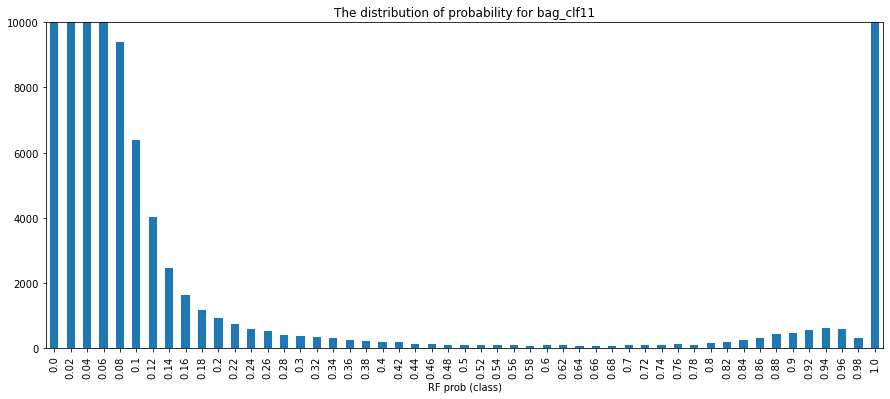

In [165]:
counts_top118 = {}
for i in prob11:
    if i in counts_top118: # list -> dict
        counts_top118[i] += 1
    else:
        counts_top118[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top118).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf11")

# Threshold for bag_clf11

In [166]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf11.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

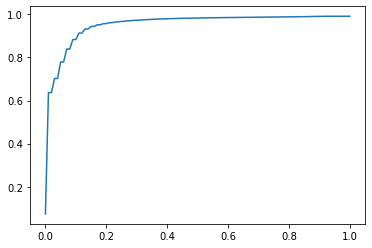

In [167]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf11 and the best threshold')

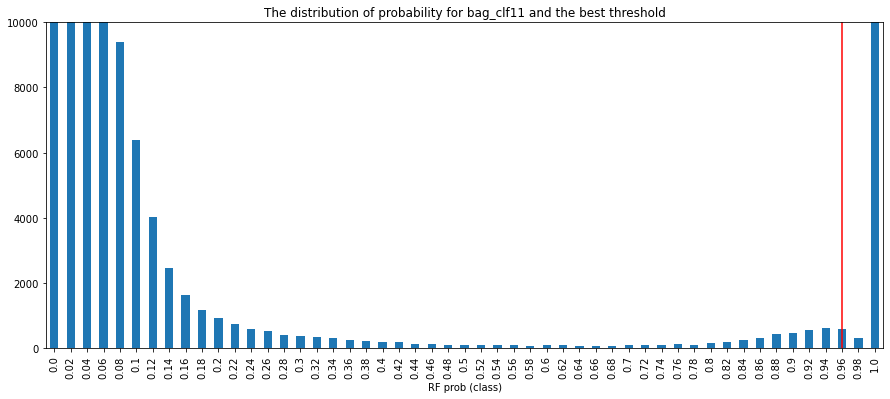

In [168]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top118).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf11 and the best threshold")

# bag_clf12 (top95 features)

Try to choose top95 important features to see the accuracy

In [169]:
top95 = bag_clf4.feature_importances_.argsort()[::-1][0:95]

In [170]:
list_train_data_x = []

for line in train_data_x:
    line = line.split(" ")
    del line[0]   # delete 'COADD_OBJECTS_ID'
    del line[-3]  # delete 'HPIX'?
    del line[-2]  # delete 'FIELD'
    del line[-1]  # delte 'TRUE_CLASS'
    
    for i in range(len(line)):  # change string to float
        line[i] = float(line[i])
        
    list_train_data_x.append(line)

    
list_train_data_y = []

for i in range(len(train_data_y)):
    list_train_data_y.append(int(train_data_y[i]))

In [171]:
list_train_data_x_top95_features = []

for i in range(len(list_train_data_x)):
    features = []
    for j in top95:
        features.append(list_train_data_x[i][j])
    list_train_data_x_top95_features.append(features)

In [172]:
list_test_data_x_top95_features = []

for i in range(len(list_test_data_x)):
    features = []
    for j in top95:
        features.append(list_test_data_x[i][j])
    list_test_data_x_top95_features.append(features)

Transfer them to matrix

In [173]:
train_x = np.array(list_train_data_x_top95_features)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x_top95_features)
test_y = np.array(list_test_data_y)

In [174]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 95)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 95)
Testing Labels Shape: (212676,)


Train the model

In [175]:
bag_clf12 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf12.fit(train_x, train_y)
result12 = bag_clf12.predict(test_x)

Confusion matrix

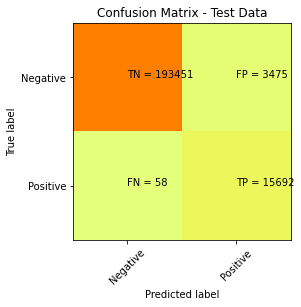

In [176]:
plot_confusion_table(test_y, result12)

Probability

In [177]:
prob12 = bag_clf12.predict_proba(test_x)[:, 1]

Auc

In [178]:
fpr12, tpr12, thresholds12  =  roc_curve(test_y, prob12) 

Compute metrics

The probability is: [0.06 0.08 0.   ... 0.   0.   0.  ]
The accuracy is: 0.9833878763941395
The precision score is: 0.8186988052381697
The recall score is: 0.9963174603174603
The auc is: 0.9984702747901919


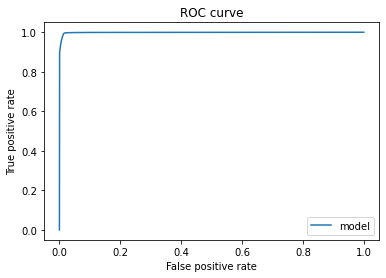

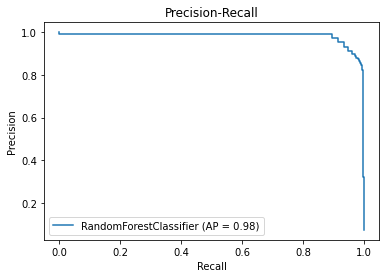

In [179]:
compute_metrics(bag_clf12, test_x, test_y)

Store metrics into lists

In [180]:
accuracy_12, precision_12, recall_12 = show_metrics(bag_clf12, test_x, test_y)
auc_12 = auc(fpr12, tpr12)
dict_metrics_11_14['bag_clf12'] = [accuracy_12, precision_12, recall_12, auc_12]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf12')

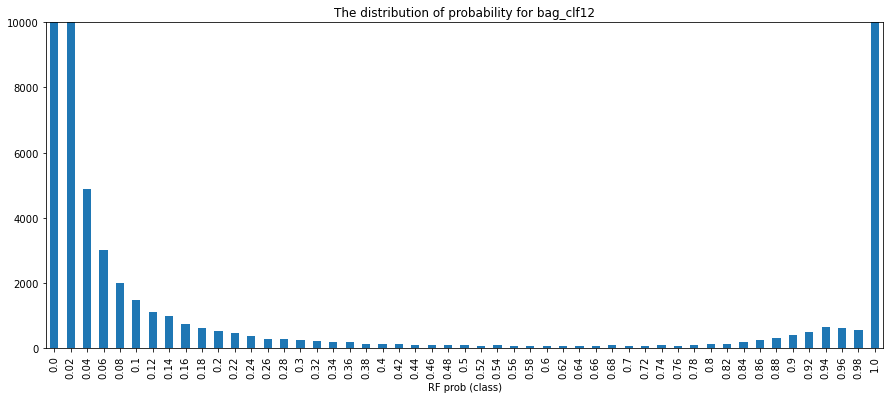

In [181]:
counts_top95 = {}
for i in prob12:
    if i in counts_top95: # list -> dict
        counts_top95[i] += 1
    else:
        counts_top95[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top95).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf12")

# Threshold for bag_clf12

In [182]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf12.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

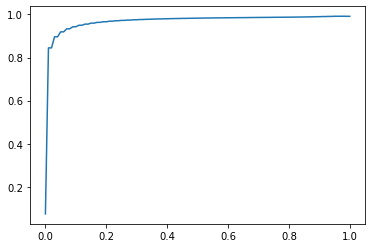

In [183]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf12 and the best threshold')

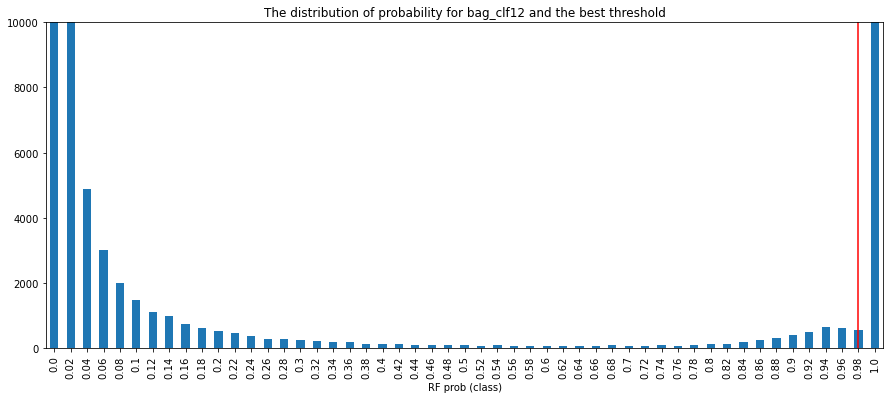

In [184]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top95).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf12 and the best threshold")

# bag_clf13 (top20 features)

Now try to choose top20 important features

In [185]:
top20 = bag_clf4.feature_importances_.argsort()[::-1][0:20]

In [186]:
list_train_data_x_top20_features = []

for i in range(len(list_train_data_x)):
    features = []
    for j in top20:
        features.append(list_train_data_x[i][j])
    list_train_data_x_top20_features.append(features)

In [187]:
list_test_data_x_top20_features = []

for i in range(len(list_test_data_x)):
    features = []
    for j in top20:
        features.append(list_test_data_x[i][j])
    list_test_data_x_top20_features.append(features)

Transfer them to matrix

In [188]:
train_x = np.array(list_train_data_x_top20_features)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x_top20_features)
test_y = np.array(list_test_data_y)

In [189]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 20)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 20)
Testing Labels Shape: (212676,)


In [190]:
bag_clf13 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf13.fit(train_x, train_y)
result13 = bag_clf13.predict(test_x)

Confusion matrix

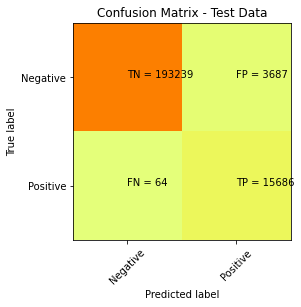

In [191]:
plot_confusion_table(test_y, result13)

Probability

In [192]:
prob13 = bag_clf13.predict_proba(test_x)[:, 1]

Auc

In [193]:
fpr13, tpr13, thresholds13  =  roc_curve(test_y, prob13) 

Compute metrics

The probability is: [0.  0.  0.1 ... 0.  0.  0. ]
The accuracy is: 0.9823628430100246
The precision score is: 0.809683580240541
The recall score is: 0.9959365079365079
The auc is: 0.9968872911571489


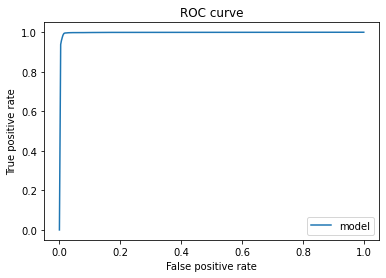

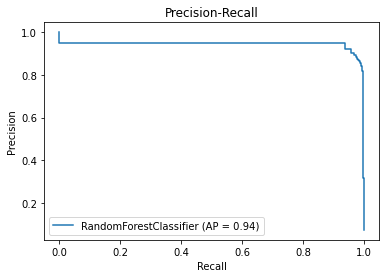

In [194]:
compute_metrics(bag_clf13, test_x, test_y)

Store metrics into lists

In [195]:
accuracy_13, precision_13, recall_13 = show_metrics(bag_clf13, test_x, test_y)
auc_13 = auc(fpr13, tpr13)
dict_metrics_11_14['bag_clf13'] = [accuracy_13, precision_13, recall_13, auc_13]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf13')

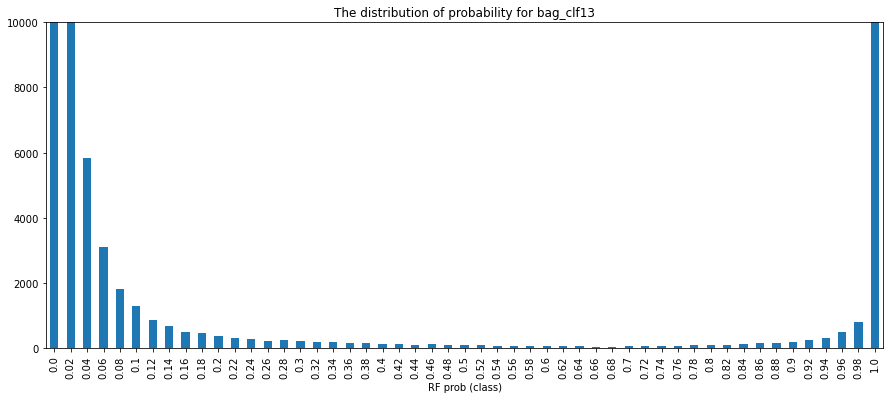

In [196]:
counts_top20 = {}
for i in prob13:
    if i in counts_top20: # list -> dict
        counts_top20[i] += 1
    else:
        counts_top20[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top20).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf13")

# Threshold for bag_clf13

In [197]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf13.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

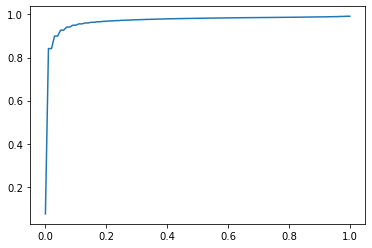

In [198]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf13 and the best threshold')

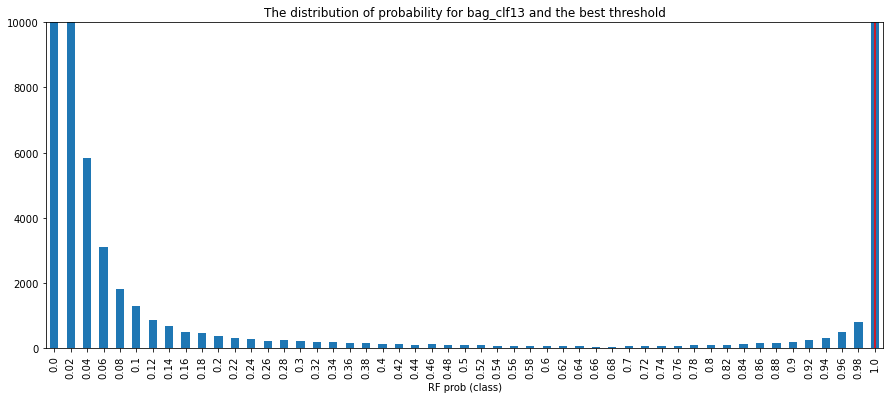

In [199]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top20).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf13 and the best threshold")

# bag_clf14 (top5 features)

We try to choose the top5 feature

In [200]:
top5 = bag_clf4.feature_importances_.argsort()[::-1][0:5]

In [201]:
list_train_data_x_top5_features = []

for i in range(len(list_train_data_x)):
    features = []
    for j in top5:
        features.append(list_train_data_x[i][j])
    list_train_data_x_top5_features.append(features)

In [202]:
list_test_data_x_top5_features = []

for i in range(len(list_test_data_x)):
    features = []
    for j in top5:
        features.append(list_test_data_x[i][j])
    list_test_data_x_top5_features.append(features)

Transfer them to matrix

In [203]:
train_x = np.array(list_train_data_x_top5_features)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x_top5_features)
test_y = np.array(list_test_data_y)

In [204]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 5)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 5)
Testing Labels Shape: (212676,)


Train the model

In [205]:
bag_clf14 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf14.fit(train_x, train_y)
result14 = bag_clf14.predict(test_x)

Confusion matrix

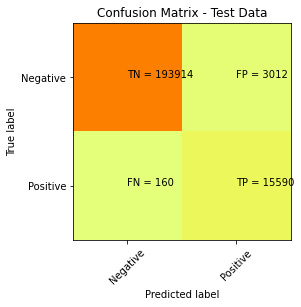

In [206]:
plot_confusion_table(test_y, result14)

Probability

In [207]:
prob14 = bag_clf14.predict_proba(test_x)[:, 1]

Auc

In [208]:
fpr14, tpr14, thresholds14  =  roc_curve(test_y, prob14) 

Compute metrics

The probability is: [0. 0. 0. ... 0. 0. 0.]
The accuracy is: 0.9850852940623296
The precision score is: 0.8380819266745512
The recall score is: 0.9898412698412699
The auc is: 0.994929016604255


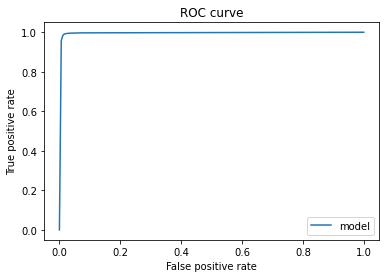

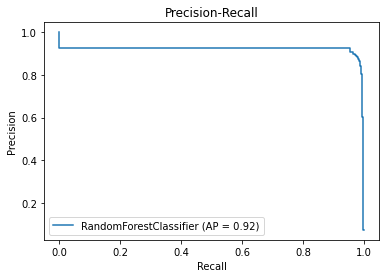

In [209]:
compute_metrics(bag_clf14, test_x, test_y)

Store metrics into lists

In [210]:
accuracy_14, precision_14, recall_14 = show_metrics(bag_clf14, test_x, test_y)
auc_14 = auc(fpr14, tpr14)
dict_metrics_11_14['bag_clf14'] = [accuracy_14, precision_14, recall_14, auc_14]

In [211]:
dict_metrics_fin = {}

In [212]:
dict_metrics_fin['model_1'] = [accuracy_14, precision_14, recall_14, auc_14]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf14')

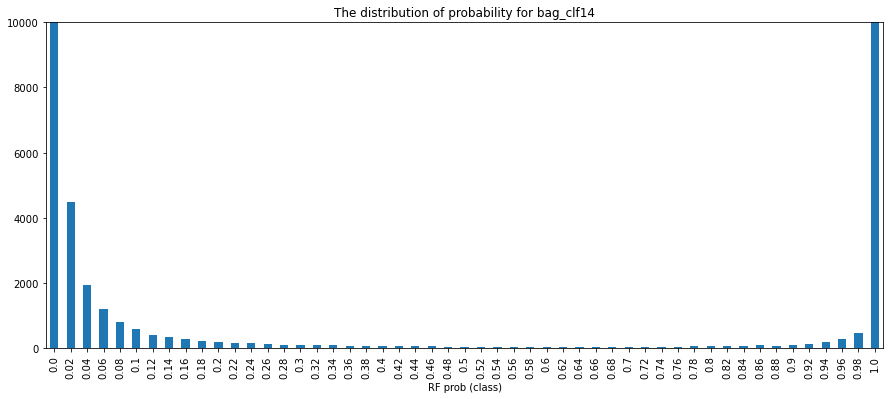

In [213]:
counts_top5 = {}
for i in prob14:
    if i in counts_top5: # list -> dict
        counts_top5[i] += 1
    else:
        counts_top5[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top5).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf14")

# Threshold for bag_clf14

In [214]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf14.predict_proba(test_x)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

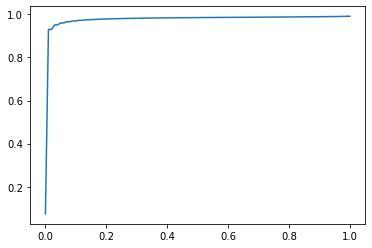

In [215]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf14 and the best threshold')

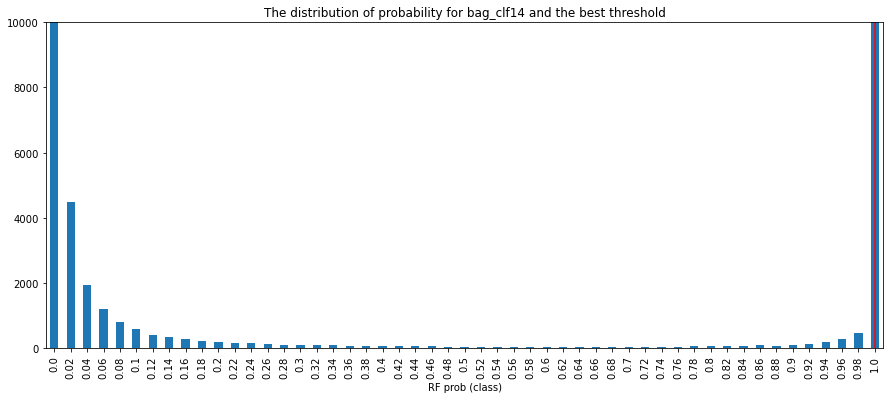

In [216]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_top5).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf14 and the best threshold")

# bag_clf1_30

**Now try to increase the number of features from 1 to 30, and find the accuracy**

In [217]:
top30 = bag_clf4.feature_importances_.argsort()[::-1][0:30]

In [218]:
top1_30 = []

for i in range(len(top30)+1):
    top1_30.append(bag_clf4.feature_importances_.argsort()[::-1][0:i])

# delete the empty list
top1_30 = top1_30[1::]

In [219]:
list_accuracy = []
list_precision = []
list_recall = []
num_of_features = 0

for keys in top1_30:
    list_train_data_x_top1_30_features = []
    list_test_data_x_top1_30_features = []

    for i in range(len(list_train_data_x)):
        features = []
        for j in keys:
            features.append(list_train_data_x[i][j])
        list_train_data_x_top1_30_features.append(features)
    
    for i in range(len(list_test_data_x)):
        features = []
        for j in keys:
            features.append(list_test_data_x[i][j])
        list_test_data_x_top1_30_features.append(features)
        
    # Transfer them to matrix
    train_x = np.array(list_train_data_x_top1_30_features)
    train_y = np.array(list_train_data_y)
    test_x = np.array(list_test_data_x_top1_30_features)
    test_y = np.array(list_test_data_y)
    
    # print('Training Features Shape:', train_x.shape)
    # print('Training Labels Shape:', train_y.shape)
    # print('Testing Features Shape:', test_x.shape)
    # print('Testing Labels Shape:', test_y.shape)
    
    bag_clf1_30 = RandomForestClassifier(
    n_estimators=50, #*** number of trees
    bootstrap=False,
    min_samples_leaf=1,
    # max_leaf_nodes=16, #*** leaf nodes
    n_jobs=-1, 
    random_state=42)

    bag_clf1_30.fit(train_x, train_y)
    result1_30 = bag_clf1_30.predict(test_x)
    
    accuracy1_30 = accuracy_score(test_y, result1_30)
    precision1_30 = precision_score(test_y, result1_30)
    recall1_30 = recall_score(test_y, result1_30)
    
    num_of_features = num_of_features + 1
    print("number of features =", num_of_features)
    
    list_accuracy.append(accuracy1_30)
    list_precision.append(precision1_30)
    list_recall.append(recall1_30)

number of features = 1
number of features = 2
number of features = 3
number of features = 4
number of features = 5
number of features = 6
number of features = 7
number of features = 8
number of features = 9
number of features = 10
number of features = 11
number of features = 12
number of features = 13
number of features = 14
number of features = 15
number of features = 16
number of features = 17
number of features = 18
number of features = 19
number of features = 20
number of features = 21
number of features = 22
number of features = 23
number of features = 24
number of features = 25
number of features = 26
number of features = 27
number of features = 28
number of features = 29
number of features = 30


Plot the graph of accuracy, precision and recall

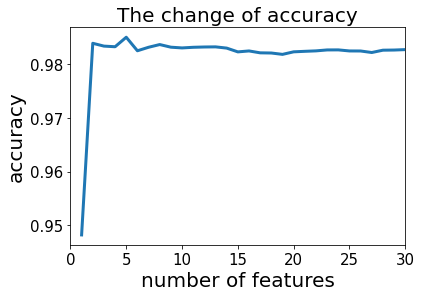

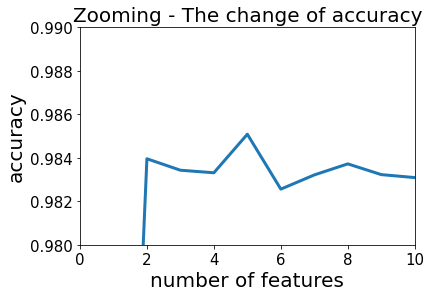

In [220]:
plt.figure(1)
plt.plot(np.arange(1,len(list_accuracy)+1), list_accuracy, linewidth=3)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.xlim(0,30)
plt.title("The change of accuracy", fontsize=20)
plt.tick_params(labelsize=15)

plt.figure(2)
# plt.plot(range(len(list_accuracy)), list_accuracy)
plt.plot(np.arange(1,len(list_accuracy)+1), list_accuracy, linewidth=3)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.xlim(0,10)
plt.ylim(0.98,0.99)
plt.title("Zooming - The change of accuracy", fontsize=20)
plt.tick_params(labelsize=15)

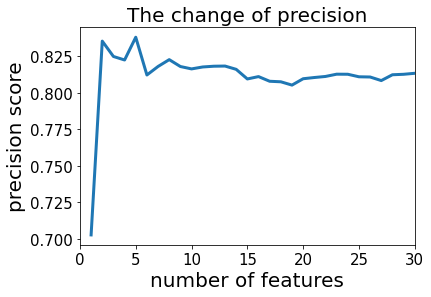

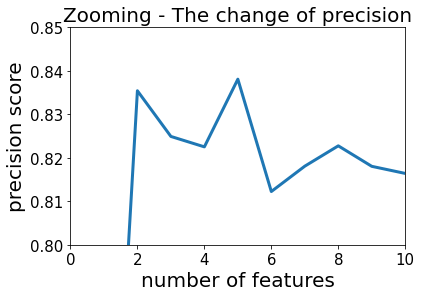

In [221]:
plt.figure(1)
plt.plot(np.arange(1,len(list_precision)+1), list_precision, linewidth=3)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("precision score", fontsize=20)
plt.xlim(0,30)
plt.title("The change of precision", fontsize=20)
plt.tick_params(labelsize=15)

plt.figure(2)
plt.plot(np.arange(1,len(list_precision)+1), list_precision, linewidth=3)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("precision score", fontsize=20)
plt.xlim(0,10)
plt.ylim(0.80,0.85)
plt.title("Zooming - The change of precision", fontsize=20)
plt.tick_params(labelsize=15)

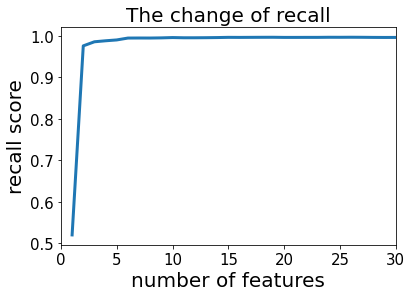

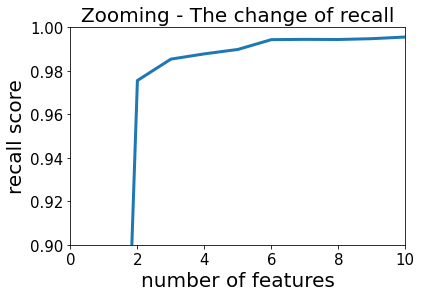

In [222]:
plt.figure(1)
plt.plot(np.arange(1,len(list_recall)+1), list_recall, linewidth=3)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("recall score", fontsize=20)
plt.xlim(0,30)
plt.title("The change of recall", fontsize=20)
plt.tick_params(labelsize=15)

plt.figure(2)
plt.plot(np.arange(1,len(list_recall)+1), list_recall, linewidth=3)
plt.xlabel("number of features", fontsize=20)
plt.ylabel("recall score", fontsize=20)
plt.xlim(0,10)
plt.ylim(0.9,1)
plt.title("Zooming - The change of recall", fontsize=20)
plt.tick_params(labelsize=15)

It seems that when the number of features = 5 the model has the largest accuracy and precision score

# Table of metrics from bag_clf11 to bag_clf14

In [223]:
pd.DataFrame(dict_metrics_11_14,index=['accuracy','precision','recall','auc'])

,bag_clf11,bag_clf12,bag_clf13,bag_clf14
accuracy,0.983115,0.983388,0.982363,0.985085
precision,0.816196,0.818699,0.809684,0.838082
recall,0.996381,0.996317,0.995937,0.989841
auc,0.998834,0.998470,0.996887,0.994929


With decreasing of features, the accuracy and recall score haven't change a lot, but the precision increased. From the metrics, I think bag_clf14 (top5 features) performs the best.

# Compare the histogram of probability from bag_clf11 to bag_clf14

Now try to put the distribution of probability of top118, top95, top20 and top5 together to make comparison.

<Figure size 432x288 with 0 Axes>

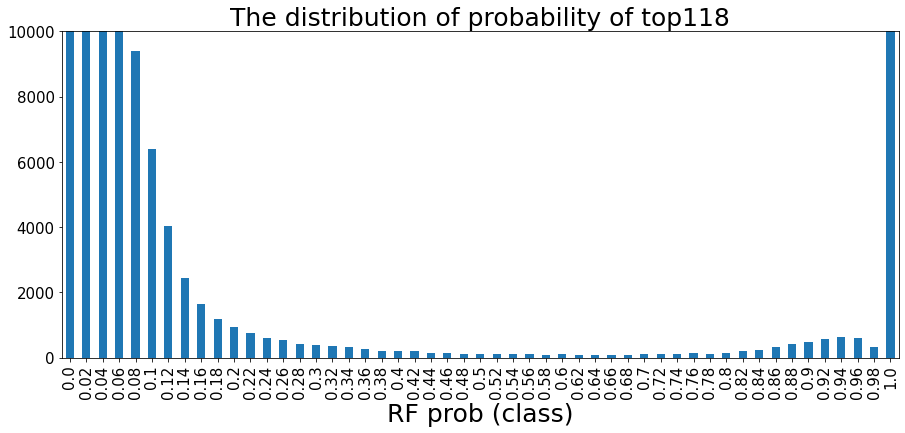

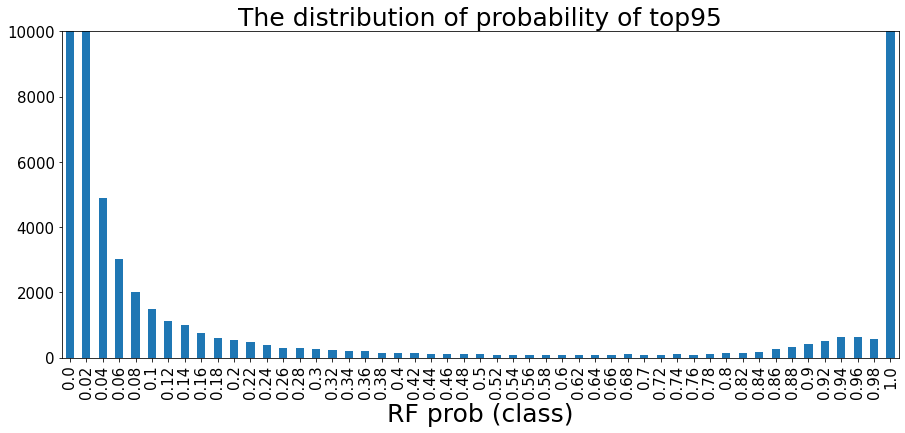

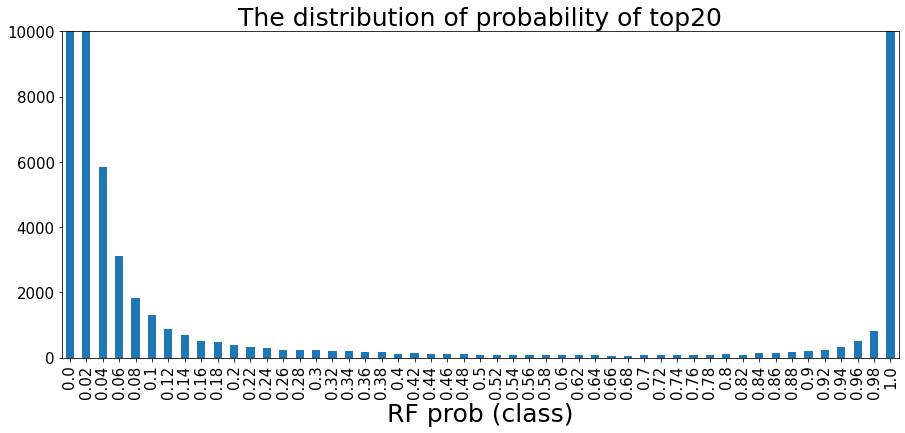

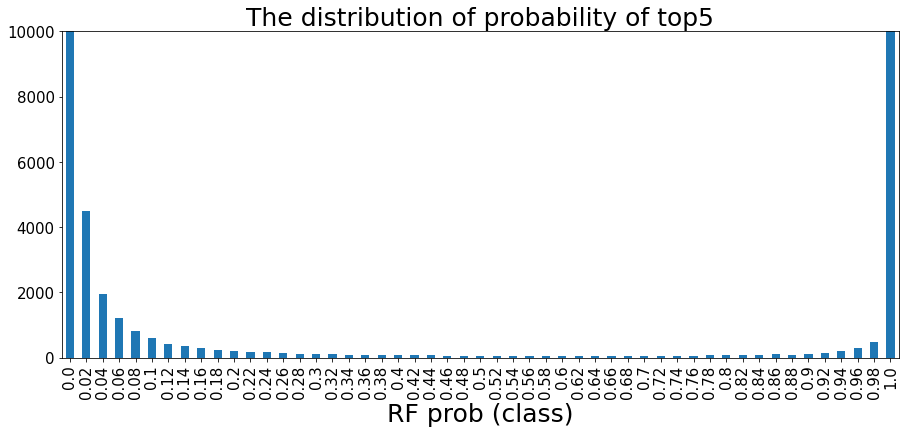

In [224]:
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of top118", fontsize=25)
pd.Series(counts_top118).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

plt.figure(2)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of top95", fontsize=25)
pd.Series(counts_top95).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

plt.figure(3)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of top20", fontsize=25)
pd.Series(counts_top20).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

plt.figure(4)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
plt.title("The distribution of probability of top5", fontsize=25)
pd.Series(counts_top5).sort_index().plot.bar(fontsize=10)
plt.tick_params(labelsize=15)

From the results of table and graph, as far as I think, with the decreasing of features, the probability are more likly to converge to 0 or 1, rather than the value between 0 and 1.

Thus, I think the model with top5 features performs the best because the choose of threshold will have little influence to the result of metrics.

Now, bag_clf14 is the final best model we needed, we just call it model1.

# Choose different thresholds for class1 and class0 for model1

In [225]:
list_train_data_x_top5_features = []

for i in range(len(list_train_data_x)):
    features = []
    for j in top5:
        features.append(list_train_data_x[i][j])
    list_train_data_x_top5_features.append(features)

In [226]:
list_test_data_x_top5_features = []

for i in range(len(list_test_data_x)):
    features = []
    for j in top5:
        features.append(list_test_data_x[i][j])
    list_test_data_x_top5_features.append(features)

Transfer them to matrix

In [227]:
train_x = np.array(list_train_data_x_top5_features)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x_top5_features)
test_y = np.array(list_test_data_y)

In [228]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 5)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 5)
Testing Labels Shape: (212676,)


# Class 1

Put the threshold in 0.9

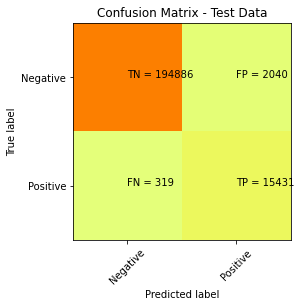

In [229]:
threshold = 0.9

predicted_proba = bag_clf14.predict_proba(test_x)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0104

TPR = TP / (TP + FN) = 0.9797

In [230]:
TP_1, FP_1, TN_1, FN_1 = perf_measure(test_y, predicted)
FPR_1 = FP_1 / (TN_1 + FP_1)
TPR_1 = TP_1 / (TP_1 + FN_1)

Put the threshold in 0.8

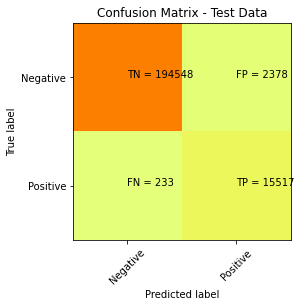

In [231]:
threshold = 0.8

predicted_proba = bag_clf14.predict_proba(test_x)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0121

TPR = TP / (TP + FN) = 0.9852

In [232]:
TP_2, FP_2, TN_2, FN_2 = perf_measure(test_y, predicted)
FPR_2 = FP_2 / (TN_2 + FP_2)
TPR_2 = TP_2 / (TP_2 + FN_2)

Plot

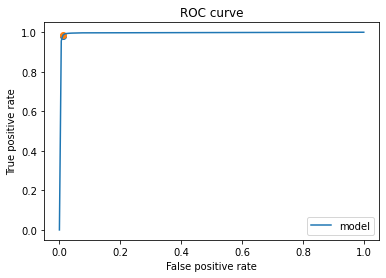

In [233]:
plt.plot(fpr14,tpr14, label="model")
plt.scatter(FPR_1, TPR_1)
plt.scatter(FPR_2, TPR_2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend()

## Class 0

Put the threshold in 0.2

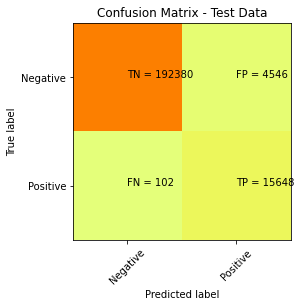

In [234]:
threshold = 0.2

predicted_proba = bag_clf14.predict_proba(test_x)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0231

TPR = TP / (TP + FN) = 0.9935

In [235]:
TP_3, FP_3, TN_3, FN_3 = perf_measure(test_y, predicted)
FPR_3 = FP_3 / (TN_3 + FP_3)
TPR_3 = TP_3 / (TP_3 + FN_3)

Put the threshold in 0.1

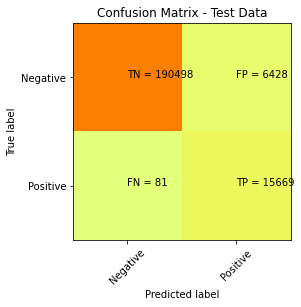

In [236]:
threshold = 0.1

predicted_proba = bag_clf14.predict_proba(test_x)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0326

TPR = TP / (TP + FN) = 0.9949

In [237]:
TP_4, FP_4, TN_4, FN_4 = perf_measure(test_y, predicted)
FPR_4 = FP_4 / (TN_4 + FP_4)
TPR_4 = TP_4 / (TP_4 + FN_4)

Plot

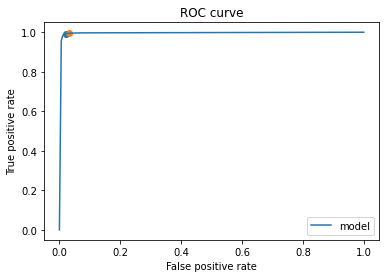

In [238]:
plt.plot(fpr14,tpr14, label="model")
plt.scatter(FPR_3, TPR_3)
plt.scatter(FPR_4, TPR_4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend()

The result shows that the change of threshold has little influence to the value of false positive rate and true positive rate

# PCA

Till now, we always used the full 153 features to train the model, now we want to reduce the dimension

In [239]:
list_train_data_x = []

for line in train_data_x:
    line = line.split(" ")
    del line[0]   # delete 'COADD_OBJECTS_ID'
    del line[-3]  # delete 'HPIX'?
    del line[-2]  # delete 'FIELD'
    del line[-1]  # delte 'TRUE_CLASS'
    
    for i in range(len(line)):  # change string to float
        line[i] = float(line[i])
        
    list_train_data_x.append(line)

    
list_train_data_y = []

for i in range(len(train_data_y)):
    list_train_data_y.append(int(train_data_y[i]))

Transfer them to matrix

In [240]:
train_x = np.array(list_train_data_x)
train_y = np.array(list_train_data_y)
test_x = np.array(list_test_data_x)
test_y = np.array(list_test_data_y)

In [241]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (127878, 153)
Training Labels Shape: (127878,)
Testing Features Shape: (212676, 153)
Testing Labels Shape: (212676,)


**Plot the graph and table of cumulative variance ratio**

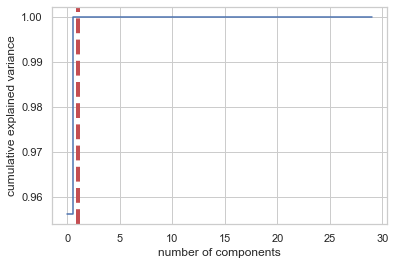

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.956057,9.560565e-01
1,0.999996,4.393926e-02
2,1.000000,4.211766e-06
3,1.000000,5.951284e-10
4,1.000000,4.984866e-11
5,1.000000,2.069501e-11
6,1.000000,2.028482e-11
7,1.000000,1.086048e-11
8,1.000000,7.464252e-12
9,1.000000,1.952352e-12


In [242]:
pca_test = PCA(n_components=30)
pca_test.fit(train_x)
sns.set(style='whitegrid')
# plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.step(range(30), np.cumsum(pca_test.explained_variance_ratio_), where='mid')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=1, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [243]:
# this is not the only way to ...

# bag_clf15 (PCA)

For model1, we have find the best model which only use top5 features. Here, we just set n_components=5 to see the result of PCA using data of 5 dimension.

In [244]:
pca = PCA(n_components=5)
pca.fit(train_x)

newX_train = pca.transform(train_x)
newX_test = pca.transform(test_x)

In [245]:
bag_clf15 = RandomForestClassifier(
    n_estimators=50,
    bootstrap=False,
    min_samples_leaf=1,
    n_jobs=-1, 
    random_state=42)

bag_clf15.fit(newX_train, train_y)
result15 = bag_clf15.predict(newX_test)

Confusion matrix

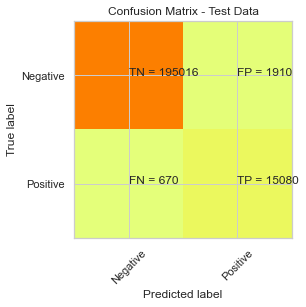

In [246]:
plot_confusion_table(test_y, result15)

Probability

In [247]:
prob15 = bag_clf15.predict_proba(newX_test)[:, 1]

Auc

In [248]:
fpr15, tpr15, thresholds15  =  roc_curve(test_y, prob15) 

Compute metrics

The probability is: [0.   0.   0.04 ... 0.   0.   0.  ]
The accuracy is: 0.9878688709586413
The precision score is: 0.8875809299587993
The recall score is: 0.9574603174603175
The auc is: 0.9921183825557551


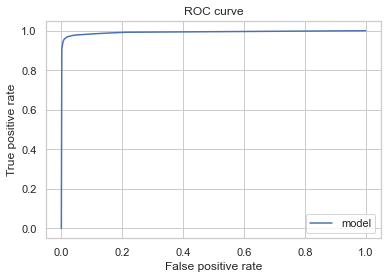

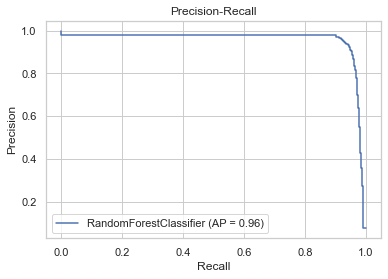

In [249]:
compute_metrics(bag_clf15, newX_test, test_y)

Store metrics into lists

In [250]:
accuracy_15, precision_15, recall_15 = show_metrics(bag_clf15, newX_test, test_y)
auc_15 = auc(fpr15, tpr15)
dict_metrics_fin['model_2'] = [accuracy_15, precision_15, recall_15, auc_15]

Plot the distribution of probability

Text(0.5, 1.0, 'The distribution of probability for bag_clf15')

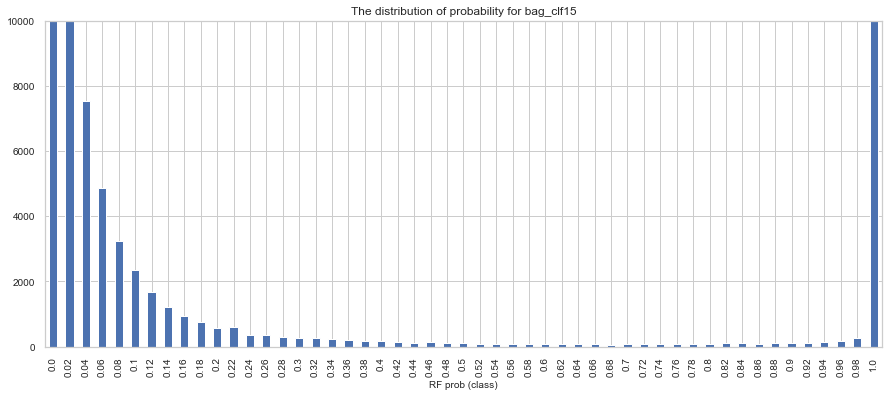

In [251]:
counts_pca = {}
for i in prob15:
    if i in counts_pca: # list -> dict
        counts_pca[i] += 1
    else:
        counts_pca[i] = 1
        
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_pca).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for bag_clf15")

Finally show the feature importance using this model

In [252]:
# Get feature importances
importances_pca20 = list(bag_clf15.feature_importances_)

# List of tuples with variable and importance
feature_importances_pca20 = [(feature, round(importance, 4)) for feature, importance in zip(cols, importances_pca20)]

# Sort the feature importances by most important first
feature_importances_pca20 = sorted(feature_importances_pca20, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_pca20];

Variable: L                    Importance: 0.3263
Variable: DEC                  Importance: 0.1901
Variable: RA                   Importance: 0.179
Variable: B                    Importance: 0.1656
Variable: SPREAD_MODEL_G       Importance: 0.139


# Threshold for bag_clf15

In [253]:
threshold_accuracy = []
list_threshold = []

for i in range(0,101):  
    threshold = i/100
    
    list_threshold.append(threshold)

    predicted_proba = bag_clf15.predict_proba(newX_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')

    accuracy = accuracy_score(test_y, predicted)

    threshold_accuracy.append(accuracy_score(test_y, predicted))

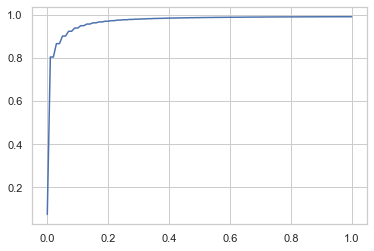

In [254]:
plt.plot(list_threshold, threshold_accuracy)

Plot the best threshold

Text(0.5, 1.0, 'The distribution of probability for bag_clf15 and the best threshold')

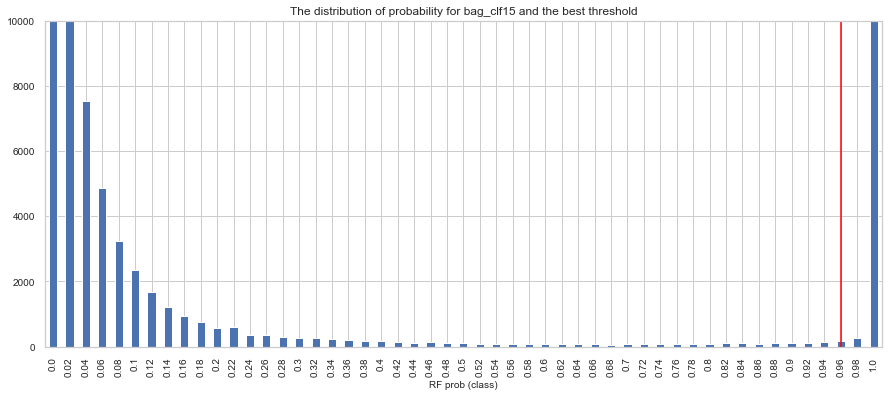

In [255]:
for i in range(len(threshold_accuracy)):
    if threshold_accuracy[i] == max(threshold_accuracy):
        max_accuracy = list_threshold[i]

plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=10)
pd.Series(counts_pca).sort_index().plot.bar(fontsize=10)
plt.axvline(50*max_accuracy, color="red")
plt.title("The distribution of probability for bag_clf15 and the best threshold")

# Choose different thresholds for class1 and class0 for model2

# Class 1

Put the threshold in 0.9

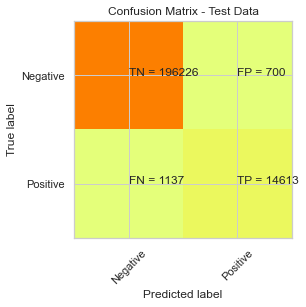

In [256]:
threshold = 0.9

predicted_proba = bag_clf15.predict_proba(newX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0036

TPR = TP / (TP + FN) = 0.9278

In [257]:
TP_5, FP_5, TN_5, FN_5 = perf_measure(test_y, predicted)
FPR_5 = FP_5 / (TN_5 + FP_5)
TPR_5 = TP_5 / (TP_5 + FN_5)

Put the threshold in 0.8

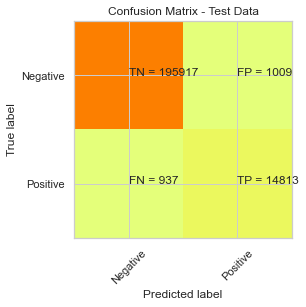

In [258]:
threshold = 0.8

predicted_proba = bag_clf15.predict_proba(newX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0051

TPR = TP / (TP + FN) = 0.9405

In [259]:
TP_6, FP_6, TN_6, FN_6 = perf_measure(test_y, predicted)
FPR_6 = FP_6 / (TN_6 + FP_6)
TPR_6 = TP_6 / (TP_6 + FN_6)

Plot

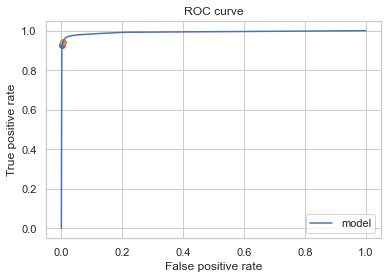

In [260]:
plt.plot(fpr15,tpr15, label="model")
plt.scatter(FPR_5, TPR_5)
plt.scatter(FPR_6, TPR_6)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend()

# Class 0

Put the threshold in 0.2

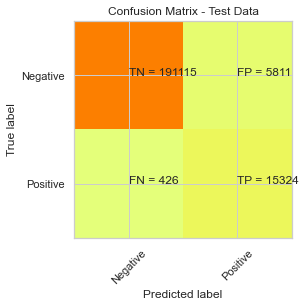

In [261]:
threshold = 0.2

predicted_proba = bag_clf15.predict_proba(newX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0295

TPR = TP / (TP + FN) = 0.9730

In [262]:
TP_7, FP_7, TN_7, FN_7 = perf_measure(test_y, predicted)
FPR_7 = FP_7 / (TN_7 + FP_7)
TPR_7 = TP_7 / (TP_7 + FN_7)

Put the threshold in 0.1

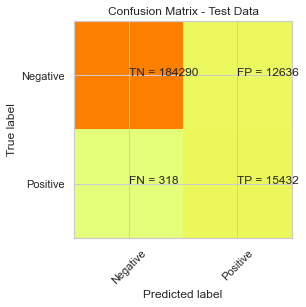

In [263]:
threshold = 0.1

predicted_proba = bag_clf15.predict_proba(newX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

plot_confusion_table(test_y, predicted)

FPR = FP / (TN + FP) = 0.0642

TPR = TP / (TP + FN) = 0.9798

In [264]:
TP_8, FP_8, TN_8, FN_8 = perf_measure(test_y, predicted)
FPR_8 = FP_8 / (TN_8 + FP_8)
TPR_8 = TP_8 / (TP_8 + FN_8)

Plot

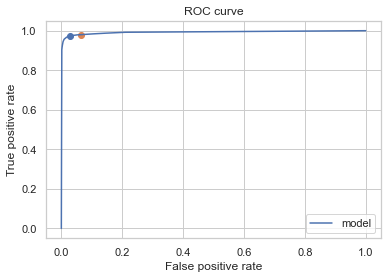

In [265]:
plt.plot(fpr15,tpr15, label="model")
plt.scatter(FPR_7, TPR_7)
plt.scatter(FPR_8, TPR_8)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend()

For class1, the change of threshold will have little influence to false positive rate and true positive rate. However, for class0, the change of threshold from 0.2 to 0.1 cause a big change of false positive rate and true positive rate.

I think it means the choosing of threshold will easily influence the confusion matrix for this model.

# Final part: Try to compare the performance of model 1 and model 2

Metrics

In [266]:
pd.DataFrame(dict_metrics_fin,index=['accuracy','precision','recall','auc'])

,model_1,model_2
accuracy,0.985085,0.987869
precision,0.838082,0.887581
recall,0.989841,0.957460
auc,0.994929,0.992118


The accuracy are similar

Precision and recall analysis the performance of model from different aspects. 

For precision, it mainly concentrate on accuracy, have you correctly predict the result?

For recall, it mainly means "order sth to return" or "the ability to remember sth that you have learned or sth that has happened in the past"

We can see that from the formula, they don't have direct connection, but we need to find a balance between them.

Distribution of probability

<Figure size 432x288 with 0 Axes>

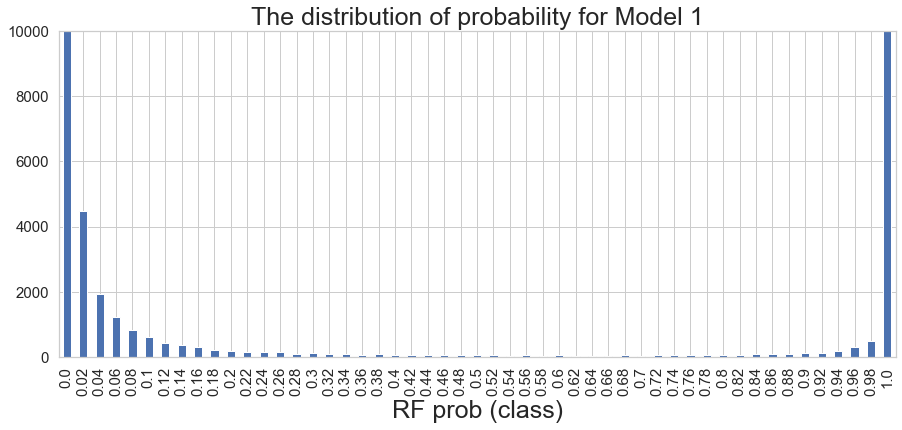

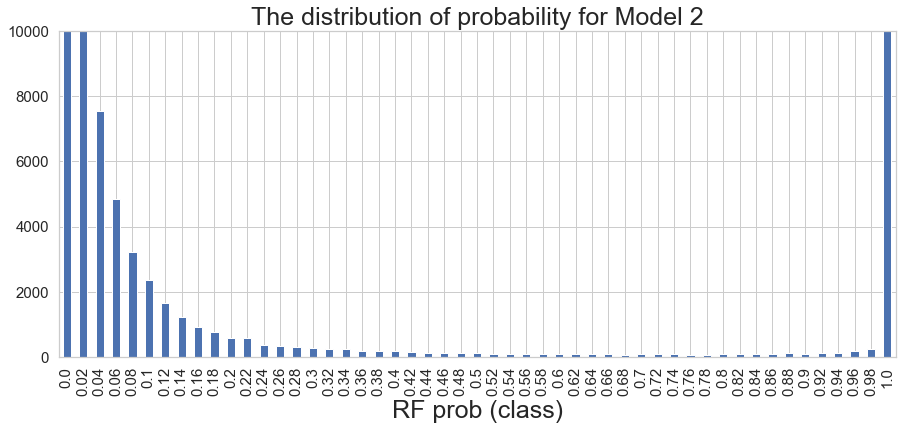

In [267]:
plt.figure(1)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
pd.Series(counts_top5).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for Model 1", fontsize=25)
plt.tick_params(labelsize=15)

plt.figure(2)
plt.figure(figsize=(15, 6))
plt.ylim(0, 10000)
plt.xlabel("RF prob (class)", fontsize=25)
pd.Series(counts_pca).sort_index().plot.bar(fontsize=10)
plt.title("The distribution of probability for Model 2", fontsize=25)
plt.tick_params(labelsize=15)

The influence of thresholds

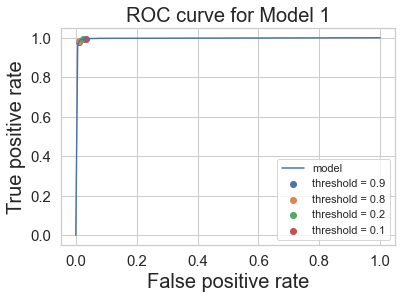

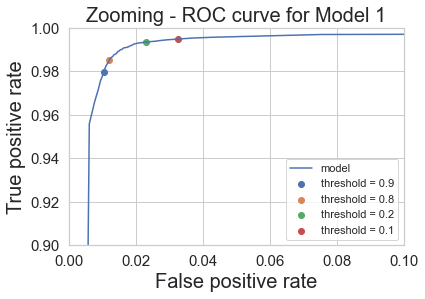

In [268]:
plt.figure(1)
plt.plot(fpr14,tpr14, label="model")
plt.scatter(FPR_1, TPR_1, label="threshold = 0.9")
plt.scatter(FPR_2, TPR_2, label="threshold = 0.8")
plt.scatter(FPR_3, TPR_3, label="threshold = 0.2")
plt.scatter(FPR_4, TPR_4, label="threshold = 0.1")
plt.xlabel("False positive rate", fontsize=20)
plt.ylabel("True positive rate", fontsize=20)
plt.title("ROC curve for Model 1", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend()

plt.figure(2)
plt.plot(fpr14,tpr14, label="model")
plt.scatter(FPR_1, TPR_1, label="threshold = 0.9")
plt.scatter(FPR_2, TPR_2, label="threshold = 0.8")
plt.scatter(FPR_3, TPR_3, label="threshold = 0.2")
plt.scatter(FPR_4, TPR_4, label="threshold = 0.1")
plt.xlim(0, 0.1)
plt.ylim(0.9,1)
plt.xlabel("False positive rate", fontsize=20)
plt.ylabel("True positive rate", fontsize=20)
plt.title("Zooming - ROC curve for Model 1", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend()

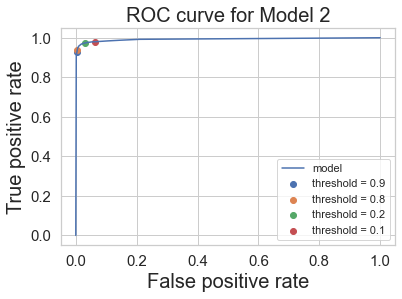

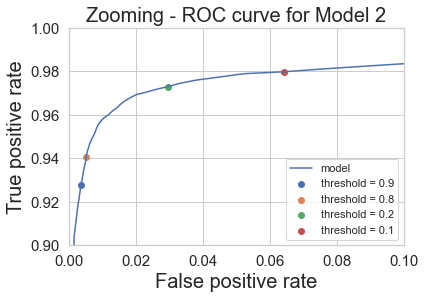

In [269]:
plt.figure(1)
plt.plot(fpr15,tpr15, label="model")
plt.scatter(FPR_5, TPR_5, label="threshold = 0.9")
plt.scatter(FPR_6, TPR_6, label="threshold = 0.8")
plt.scatter(FPR_7, TPR_7, label="threshold = 0.2")
plt.scatter(FPR_8, TPR_8, label="threshold = 0.1")
plt.xlabel("False positive rate", fontsize=20)
plt.ylabel("True positive rate", fontsize=20)
plt.title("ROC curve for Model 2", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend()

plt.figure(2)
plt.plot(fpr15,tpr15, label="model")
plt.scatter(FPR_5, TPR_5, label="threshold = 0.9")
plt.scatter(FPR_6, TPR_6, label="threshold = 0.8")
plt.scatter(FPR_7, TPR_7, label="threshold = 0.2")
plt.scatter(FPR_8, TPR_8, label="threshold = 0.1")
plt.xlim(0, 0.1)
plt.ylim(0.9,1)
plt.xlabel("False positive rate", fontsize=20)
plt.ylabel("True positive rate", fontsize=20)
plt.title("Zooming - ROC curve for Model 2", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend()